In [1]:
import cv2     # para capturar vídeos
import matplotlib.pyplot as plt    #para trazar las imágenes
%matplotlib inline
import pandas as pd #para el procesamiento y análisis de datos
from keras.preprocessing import image   # para preprocesar las imágenes
import numpy as np    # para operaciones matemáticas
from skimage.transform import resize   # para cambiar el tamaño de las imágenes
import os, shutil
import keras
from keras import backend as K
from tensorflow.python.client import device_lib
from keras.layers import Dense, Dropout, Flatten #para crear red neuronal
from keras.models import load_model #para cargar modelos guardados 
from IPython.display import Image, display #para mostrar imágenes
from keras import optimizers #optimazer
from keras_preprocessing.image import ImageDataGenerator # generador de imágenes
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras import models
from keras import layers
from PIL import Image

Using TensorFlow backend.


El siguiente código aclara qué potencia de computación usaremos para enseñar nuestros modelos.

In [2]:
keras.__version__
K.tensorflow_backend._get_available_gpus()
os.environ["CUDA_VISIBLE_DEVICES"]="0"
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8693464303537019076
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1481562521
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4660051085278173017
physical_device_desc: "device: 0, name: GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [3]:
#Carpetas que contiene video informacion
video_folders = ["videodata\\Dramatic scenes\\Drama.mp4", 
                 "videodata\\Chase scenes\\Chase scenes.mp4",
                 "videodata\\Scenes of fights\\Scenes of fights.mp4", 
                 "videodata\\Scenes of love and joy\\Scenes of love and joy.mp4",
                 "videodata\\Scenes of shooting\\Scenes of shooting.mp4"]

#Carpetas que contiene imagenes obtenido despues del cortar video
frame_folders = ["framedata\\Dramatic scenes",
                 "framedata\\Chase scenes",
                 "framedata\\Scenes of fights",
                 "framedata\\Scenes of love and joy", 
                 "framedata\\Scenes of shooting"]

In [ ]:
#Funcion que nos permite obtener imagenes a partir de video

def make_frames(videofolder, framefolder):
    for i in range(len(videofolder)):
        cap = cv2.VideoCapture(videofolder[i])
        framerate = int(cap.get(cv2.CAP_PROP_FPS))
        framecount = 0
        currentFrame = 1
        success = True

        try:
            if not os.path.exists(framefolder[i]):
                os.makedirs(framefolder[i])
        except OSError:
            print ('Error: Creating directory of data')
        while(success):
            framecount += 1
            success, image = cap.read()
            if framecount == int(framerate * currentFrame):
                filename = "{}/frame{}.jpg".format(framefolder[i], currentFrame)
                print ('Creating...' + filename)
                cv2.imwrite(filename, image)
                currentFrame += 1
    cap.release()
    cv2.destroyAllWindows()
    return "finish"

In [ ]:
#Creamos fotogramas 
make_frames(video_folders, frame_folders)

In [ ]:
#Ruta al directorio con el conjunto de datos original
original_dataset_dir = "framedata"

#Catálogo para guardar el conjunto de datos seleccionado
base_dir = "modify_data"
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
#Catálogo para el conjunto de entrenamiento
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
#Catálogo para el conjunto de pruebas
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
#Catálogo para el conjunto de control 
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    
#--------------------------------------------------------------------
#Catálogo para el conjunto de entrenamiento dramatic scenes
train_dramsscen_dir = os.path.join(train_dir, 'dramaric_scenes')
if not os.path.exists(train_dramsscen_dir):
    os.mkdir(train_dramsscen_dir)

#Catálogo para el conjunto de entrenamiento chase scenes
train_chasescen_dir = os.path.join(train_dir, 'chase_scenes')
if not os.path.exists(train_chasescen_dir):
    os.mkdir(train_chasescen_dir)

#Catálogo para el conjunto de entrenamiento scenes of fights
train_fightscen_dir = os.path.join(train_dir, 'scenes_of_figths')
if not os.path.exists(train_fightscen_dir):
    os.mkdir(train_fightscen_dir)

#Catálogo para el conjunto de entrenamiento scenes of love and joy
train_lovejoy_dir = os.path.join(train_dir, 'scenes_of_love_and_joy')
if not os.path.exists(train_lovejoy_dir):
    os.mkdir(train_lovejoy_dir)

#Catálogo para el conjunto de entrenamiento scenes of shooting
train_shotscen_dir = os.path.join(train_dir, 'scenes_of_shooting')
if not os.path.exists(train_shotscen_dir):
    os.mkdir(train_shotscen_dir)
#--------------------------------------------------------------------
#--------------------------------------------------------------------
#Catálogo para el conjunto de validacion dramatic scenes
validation_dramsscen_dir = os.path.join(validation_dir, 'dramaric_scenes')
if not os.path.exists(validation_dramsscen_dir):
    os.mkdir(validation_dramsscen_dir)

#Catálogo para el conjunto de validacion chase scenes
validation_chasescen_dir = os.path.join(validation_dir, 'chase_scenes')
if not os.path.exists(validation_chasescen_dir):
    os.mkdir(validation_chasescen_dir)

#Catálogo para el conjunto de validacion scenes of fights
validation_fightscen_dir = os.path.join(validation_dir, 'scenes_of_figths')
if not os.path.exists(validation_fightscen_dir):
    os.mkdir(validation_fightscen_dir)

#Catálogo para el conjunto de validacion scenes of love and joy
validation_lovejoy_dir = os.path.join(validation_dir, 'scenes_of_love_and_joy')
if not os.path.exists(validation_lovejoy_dir):
    os.mkdir(validation_lovejoy_dir)

#Catálogo para el conjunto de validacion scenes of shooting
validation_shotscen_dir = os.path.join(validation_dir, 'scenes_of_shooting')
if not os.path.exists(validation_shotscen_dir):
    os.mkdir(validation_shotscen_dir)
#-------------------------------------------------------------------
#-------------------------------------------------------------------
#Catálogo para el conjunto de test dramatic scenes
test_dramsscen_dir = os.path.join(test_dir, 'dramaric_scenes')
if not os.path.exists(test_dramsscen_dir):
    os.mkdir(test_dramsscen_dir)

#Catálogo para el conjunto de test chaseing scenes
test_chasescen_dir = os.path.join(test_dir, 'chase_scenes')
if not os.path.exists(test_chasescen_dir):
    os.mkdir(test_chasescen_dir)

#Catálogo para el conjunto de test scenes of fights
test_fightscen_dir = os.path.join(test_dir, 'scenes_of_figths')
if not os.path.exists(test_fightscen_dir):
    os.mkdir(test_fightscen_dir)

#Catálogo para el conjunto de test scenes of love and joy
test_lovejoy_dir = os.path.join(test_dir, 'scenes_of_love_and_joy')
if not os.path.exists(test_lovejoy_dir):
    os.mkdir(test_lovejoy_dir)

#Catálogo para el conjunto de test scenes of shooting
test_shotscen_dir = os.path.join(test_dir, 'scenes_of_shooting')
if not os.path.exists(test_shotscen_dir):
    os.mkdir(test_shotscen_dir)

In [ ]:
#Copiamos imagenes cortadas a las carpetas train, test, validation 
#Aqui es necesario indicar cuantas imagenes tiene que tener cada carpeta 
#Drama scenes 849
dataset_dir = os.path.join(original_dataset_dir, 'Dramatic scenes')
fnames = ['frame{}.jpg'.format(i) for i in range(1, 590)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(train_dramsscen_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['frame{}.jpg'.format(i) for i in range(590, 720)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(validation_dramsscen_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['frame{}.jpg'.format(i) for i in range(720, 849)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(test_dramsscen_dir, fname)
    shutil.copyfile(src, dst)
    
#Copying chase_scenes 1345
dataset_dir = os.path.join(original_dataset_dir, 'Chase scenes')
fnames = ['frame{}.jpg'.format(i) for i in range(1, 940)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(train_chasescen_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['frame{}.jpg'.format(i) for i in range(940, 1140)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(validation_chasescen_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['frame{}.jpg'.format(i) for i in range(1140, 1345)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(test_chasescen_dir, fname)
    shutil.copyfile(src, dst)

#Copying scenes_of_figths 999
dataset_dir = os.path.join(original_dataset_dir, 'Scenes of fights')
fnames = ['frame{}.jpg'.format(i) for i in range(1, 698)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(train_fightscen_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['frame{}.jpg'.format(i) for i in range(698, 849)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(validation_fightscen_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['frame{}.jpg'.format(i) for i in range(849, 999)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(test_fightscen_dir, fname)
    shutil.copyfile(src, dst)


#Copying scenes_of_love_and_joy 720
dataset_dir = os.path.join(original_dataset_dir, 'Scenes of love and joy')
fnames = ['frame{}.jpg'.format(i) for i in range(1, 500)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(train_lovejoy_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['frame{}.jpg'.format(i) for i in range(500, 612)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(validation_lovejoy_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['frame{}.jpg'.format(i) for i in range(612, 720)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(test_lovejoy_dir, fname)
    shutil.copyfile(src, dst)

#Copying scenes_of_shooting 974
dataset_dir = os.path.join(original_dataset_dir, 'Scenes of shooting')
fnames = ['frame{}.jpg'.format(i) for i in range(1, 680)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(train_shotscen_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['frame{}.jpg'.format(i) for i in range(680, 828)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(validation_shotscen_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['frame{}.jpg'.format(i) for i in range(828, 974)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(test_shotscen_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
#Variables que guardan rutas a datos que consisten en fotos
train_dir = "modify_data\\train"
test_dir = "modify_data\\test"
validation_dir = "modify_data\\validation"

In [44]:
#Creamos modelo CNN 
from keras import layers
from keras import models
from keras.utils.vis_utils import plot_model

CNN = models.Sequential()
CNN.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
CNN.add(layers.MaxPooling2D((2, 2)))
CNN.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
CNN.add(layers.MaxPooling2D((2, 2)))
CNN.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
CNN.add(layers.MaxPooling2D((2, 2)))
CNN.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
CNN.add(layers.MaxPooling2D((2, 2)))
CNN.add(layers.Conv2D(512, (3, 3), activation = 'relu'))
CNN.add(layers.MaxPooling2D((2, 2)))
CNN.add(layers.Flatten())
CNN.add(layers.Dense(1024, activation = 'relu'))
CNN.add(Dropout(0.5))
CNN.add(layers.Dense(512, activation = 'relu'))
CNN.add(Dropout(0.5))
CNN.add(layers.Dense(5, activation = 'softmax'))

In [45]:
CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 256)       295168    
__________

In [46]:
#Elegimos funcion de perdida y optimizador

from keras import optimizers

CNN.compile(loss = 'categorical_crossentropy',
           optimizer = optimizers.RMSprop(lr = 1e-4),
           metrics = ['acc'])

In [47]:
#Esta parte del código define las fotos de la categoría y añade nuevas 
#imágenes a los conjuntos de datos para el entrenamiento y validacion.

cnn_train_datagen = ImageDataGenerator(rescale = 1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                fill_mode='nearest')

cnn_val_datagen = ImageDataGenerator(rescale = 1./255,
                                shear_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True)

cnn_test_datagen = ImageDataGenerator(rescale = 1./255)

cnn_train_generator = cnn_train_datagen.flow_from_directory(train_dir,
                                                   target_size = (224, 224),
                                                   batch_size = 8,
                                                   class_mode = 'categorical')

cnn_validation_generator = cnn_val_datagen.flow_from_directory(validation_dir,
                                                       target_size = (224, 224),
                                                       batch_size = 8,
                                                       class_mode = 'categorical')

cnn_test_generator = cnn_test_datagen.flow_from_directory(test_dir,
                                                        target_size = (224, 224),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                        shuffle=False)

Found 3403 images belonging to 5 classes.
Found 741 images belonging to 5 classes.
Found 738 images belonging to 5 classes.


In [48]:
#Entrenamos el modelo
train_CNN = CNN.fit_generator(cnn_train_generator,
                          epochs = 20, 
                          validation_data = cnn_validation_generator)

Epoch 1/20
426/426 [==============================] - 64s 150ms/step - loss: 1.5414 - acc: 0.3157 - val_loss: 1.5093 - val_acc: 0.2874
Epoch 2/20
426/426 [==============================] - 63s 147ms/step - loss: 1.4507 - acc: 0.3928 - val_loss: 1.3055 - val_acc: 0.4696
Epoch 3/20
426/426 [==============================] - 63s 147ms/step - loss: 1.3693 - acc: 0.4302 - val_loss: 1.2046 - val_acc: 0.5655
Epoch 4/20
426/426 [==============================] - 63s 148ms/step - loss: 1.3044 - acc: 0.4667 - val_loss: 1.2529 - val_acc: 0.4561
Epoch 5/20
426/426 [==============================] - 63s 147ms/step - loss: 1.2556 - acc: 0.4900 - val_loss: 1.2005 - val_acc: 0.4885
Epoch 6/20
426/426 [==============================] - 63s 147ms/step - loss: 1.1969 - acc: 0.5304 - val_loss: 1.2941 - val_acc: 0.5034
Epoch 7/20
426/426 [==============================] - 63s 147ms/step - loss: 1.1475 - acc: 0.5445 - val_loss: 1.3029 - val_acc: 0.4211
Epoch 8/20
426/426 [==============================] - 6

In [49]:
#Demonstracion de perdida y precisión obtenidas sobre conjunto del test
loss, accuracy = CNN.evaluate_generator(cnn_test_generator, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.3259914754643578
Test accuracy: 0.6043360433604336


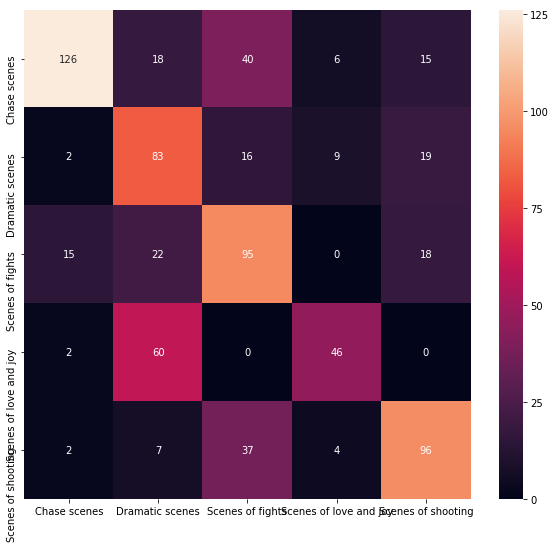

In [50]:
#Demostracion de resultados con matriz de confucion

y_pred =  CNN.predict_generator(cnn_test_generator)
y_pred_classes = np.argmax(y_pred,axis=1)
labels = cnn_test_generator.classes
#compute conf mat
conf_mat=confusion_matrix(labels,y_pred_classes)
#plot the con mat
label_names=["Chase scenes", "Dramatic scenes", "Scenes of fights", "Scenes of love and joy", "Scenes of shooting"]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)
plt.show()

In [51]:
#Guardamos modelo entrenado
CNN.save("CNN_model.h5")

In [4]:
#====================================
#Cargamos modelo preentrenado VGG19
from keras.applications import VGG19
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [5]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [6]:
#Decimos que queremos volver a entrenar los pesos en las capas desde block5_conv1 e inferiores.
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [7]:
#Añadimos nuevo clasificador

vgg_fine_tuning = models.Sequential()
vgg_fine_tuning.add(vgg_model)
vgg_fine_tuning.add(Flatten())
vgg_fine_tuning.add(Dense(512, activation='relu'))
vgg_fine_tuning.add(Dropout(0.5))
vgg_fine_tuning.add(Dense(5, activation='softmax'))

In [8]:
#Esta parte del código define las fotos de la categoría y añade nuevas 
#imágenes a los conjuntos de datos para el entrenamiento y validacion.

vgg_fine_tuning_train_datagen = ImageDataGenerator(rescale = 1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

vgg_fine_tuning_val_datagen = ImageDataGenerator(rescale = 1./255,
                                shear_range=0.2,
                                horizontal_flip=True)

vgg_fine_tuning_test_datagen = ImageDataGenerator(rescale = 1./255)

vgg_fine_tuning_train_generator = vgg_fine_tuning_train_datagen.flow_from_directory(train_dir,
                                                   target_size = (224, 224),
                                                   batch_size = 8,
                                                   class_mode = 'categorical')

vgg_fine_tuning_validation_generator = vgg_fine_tuning_val_datagen.flow_from_directory(validation_dir,
                                                       target_size = (224, 224),
                                                       batch_size = 8,
                                                       class_mode = 'categorical')

vgg_fine_tuning_test_generator = vgg_fine_tuning_test_datagen.flow_from_directory(test_dir,
                                                        target_size = (224, 224),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                        shuffle=False)

Found 3403 images belonging to 5 classes.
Found 741 images belonging to 5 classes.
Found 738 images belonging to 5 classes.


In [9]:
#Elegimos funcion de perdida y optimizador

vgg_fine_tuning.compile(loss = 'categorical_crossentropy',
           optimizer = optimizers.RMSprop(lr=1e-5),
           metrics = ['acc'])

In [10]:
#Entrenamos el modelo

train_vgg_tl = vgg_fine_tuning.fit_generator(vgg_fine_tuning_train_generator,  
                                          epochs = 20,
                                          validation_data = vgg_fine_tuning_validation_generator)

Epoch 1/20
426/426 [==============================] - 276s 648ms/step - loss: 1.5290 - acc: 0.3435 - val_loss: 1.2902 - val_acc: 0.4980
Epoch 2/20
426/426 [==============================] - 363s 853ms/step - loss: 1.2463 - acc: 0.4841 - val_loss: 1.2467 - val_acc: 0.5115
Epoch 3/20
426/426 [==============================] - 363s 852ms/step - loss: 1.1148 - acc: 0.5673 - val_loss: 1.1508 - val_acc: 0.5722
Epoch 4/20
426/426 [==============================] - 293s 687ms/step - loss: 1.0159 - acc: 0.5941 - val_loss: 1.1091 - val_acc: 0.5897
Epoch 5/20
426/426 [==============================] - 284s 666ms/step - loss: 0.9222 - acc: 0.6501 - val_loss: 1.1251 - val_acc: 0.6167
Epoch 6/20
426/426 [==============================] - 284s 667ms/step - loss: 0.8266 - acc: 0.6865 - val_loss: 1.0863 - val_acc: 0.6437
Epoch 7/20
426/426 [==============================] - 284s 666ms/step - loss: 0.7813 - acc: 0.7049 - val_loss: 1.0473 - val_acc: 0.6383
Epoch 8/20
426/426 [============================

In [11]:
#Demonstracion de perdida y precisión obtenidas sobre conjunto del test
loss, accuracy = vgg_fine_tuning.evaluate_generator(vgg_fine_tuning_test_generator, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.6148627167224594
Test accuracy: 0.8062330623306233


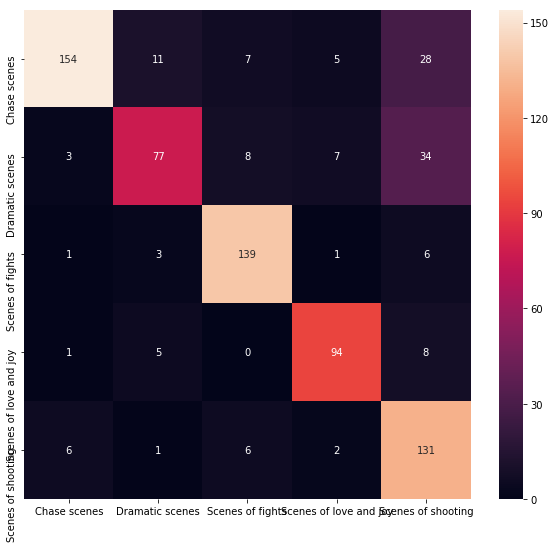

In [12]:
#Demostracion de resultados con matriz de confucion

y_pred =  vgg_fine_tuning.predict_generator(vgg_fine_tuning_test_generator)
y_pred_classes = np.argmax(y_pred,axis=1)
labels = vgg_fine_tuning_test_generator.classes
#compute conf mat
conf_mat = confusion_matrix(labels,y_pred_classes)
#plot the con mat
label_names = ["Chase scenes", "Dramatic scenes", "Scenes of fights", "Scenes of love and joy", "Scenes of shooting"]
f,ax=plt.subplots(figsize = (10,9))
sns.heatmap(conf_mat,annot = True,fmt='.0f')
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)
plt.show()


In [14]:
#Guardamos modelo
vgg_fine_tuning.save("vgg_fine_tuning.h5")

In [4]:
from keras import layers
from keras import models
from keras.utils.vis_utils import plot_model
from keras.applications import VGG19

#Cargamos modelo preentrenado VGG19
vgg19_model = VGG19(weights='imagenet',
                    include_top=False,
                    input_shape=(224, 224, 3))

In [5]:
#Esta funcion nos permite seleccionar las características de cada foto. 

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 8

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count,5))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = vgg19_model.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Tenga en cuenta que como los generadores producen datos indefinidamente en un bucle, 
            # debemos "romper" después de que cada imagen haya sido vista una vez
            break
    return features, labels

In [6]:
#Extraemos caracteriscticas
#Aqui es nesecario aclarar cuantas foto existen en cada conjunto
train_features, train_labels = extract_features(train_dir, 3403)
validation_features, validation_labels = extract_features(validation_dir, 741)
test_features, test_labels = extract_features(test_dir, 738)

Found 3403 images belonging to 5 classes.
Found 741 images belonging to 5 classes.
Found 738 images belonging to 5 classes.


In [7]:
#Por el momento, las características seleccionadas tienen una forma (ejemplos, 7 * 7 * 512). 
#Los transferiremos a la entrada del clasificador completamente conectado, por lo que debemos 
#llevar este tensor al formato (ejemplos, 25088).
train_features = np.reshape(train_features, (3403, 7 * 7 * 512))
validation_features = np.reshape(validation_features, (741, 7 * 7 * 512))
test_features = np.reshape(test_features, (738, 7 * 7 * 512))

In [8]:
#Construimos el clasificador

vgg_transfer_learning_1 = models.Sequential()
vgg_transfer_learning_1.add(layers.Dense(512, activation='relu', input_dim = 7 * 7 * 512))
vgg_transfer_learning_1.add(layers.Dropout(0.5))
vgg_transfer_learning_1.add(layers.Dense(5, activation='softmax'))

#Elegimos funcion de perdida y oprimizador
vgg_transfer_learning_1.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

#Entrenamos modelo
history = vgg_transfer_learning_1.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=8,
                    validation_data=(validation_features, validation_labels))

Train on 3403 samples, validate on 741 samples
Epoch 1/20
3403/3403 [==============================] - 16s 5ms/step - loss: 1.3128 - acc: 0.4928 - val_loss: 1.1960 - val_acc: 0.5169
Epoch 2/20
3403/3403 [==============================] - 13s 4ms/step - loss: 0.8017 - acc: 0.6964 - val_loss: 1.1348 - val_acc: 0.5412
Epoch 3/20
3403/3403 [==============================] - 14s 4ms/step - loss: 0.6152 - acc: 0.7690 - val_loss: 0.7867 - val_acc: 0.7099
Epoch 4/20
3403/3403 [==============================] - 14s 4ms/step - loss: 0.5130 - acc: 0.8128 - val_loss: 1.0447 - val_acc: 0.6113
Epoch 5/20
3403/3403 [==============================] - 14s 4ms/step - loss: 0.4261 - acc: 0.8422 - val_loss: 0.8527 - val_acc: 0.7220
Epoch 6/20
3403/3403 [==============================] - 14s 4ms/step - loss: 0.3752 - acc: 0.8522 - val_loss: 0.9397 - val_acc: 0.6626
Epoch 7/20
3403/3403 [==============================] - 14s 4ms/step - loss: 0.3373 - acc: 0.8742 - val_loss: 1.0098 - val_acc: 0.6734
Epoch 8/

In [10]:
#Demonstracion de perdida y precisión obtenidas sobre conjunto del test
score = vgg_transfer_learning_1.evaluate(test_features, test_labels, verbose=0, batch_size = 4)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6076550796984659
Test accuracy: 0.8265582655826558


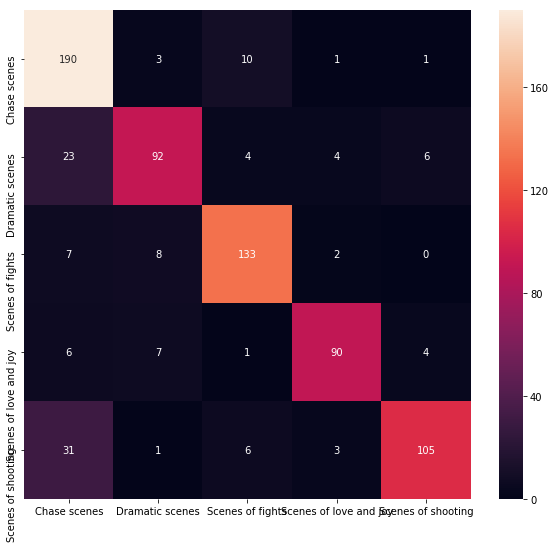

In [9]:
##Demostracion de resultados con matriz de confucion

y_pred =  vgg_transfer_learning_1.predict(test_features)
y_pred_classes = np.argmax(y_pred,axis=1)
labels = np.argmax(test_labels,axis=1)
#compute conf mat
conf_mat = confusion_matrix (labels,y_pred_classes)
#plot the con mat
label_names = ["Chase scenes", "Dramatic scenes", "Scenes of fights", "Scenes of love and joy", "Scenes of shooting"]
f,ax = plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)
plt.show()

In [12]:
#Guardamos el modelo
vgg_transfer_learning_1.save("vgg_transfer_learningcaracextr.h5")

In [5]:
#Construimos otro modelo con nuevo clasificador

from keras import models
from keras import layers
from keras.utils.vis_utils import plot_model

vgg_transfer_learning_2 = models.Sequential()
vgg_transfer_learning_2.add(vgg19_model)
vgg_transfer_learning_2.add(layers.Flatten())
vgg_transfer_learning_2.add(layers.Dense(512, activation='relu'))
vgg_transfer_learning_2.add(layers.Dense(5, activation='softmax'))


In [6]:
print('Nº de pesos entrenables antes de congelar la base convolucional:', len(vgg_transfer_learning_2.trainable_weights))

Nº de pesos entrenables antes de congelar la base convolucional: 36


In [7]:
#Congelación de pesas en un modelo pre-entrenado
vgg19_model.trainable = False

for layer in vgg19_model.layers:
        layer.trainable = False

In [8]:
print('Nº de pesos entrenables tras congelar la base convolucional:', len(vgg_transfer_learning_2.trainable_weights))

Nº de pesos entrenables tras congelar la base convolucional: 4


In [9]:
#Esta parte del código define las fotos de la categoría y añade nuevas 
#imágenes a los conjuntos de datos para el entrenamiento y validacion.
vgg_transfer_learning_train_datagen = ImageDataGenerator(rescale = 1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True)

vgg_transfer_learning_val_datagen = ImageDataGenerator(rescale = 1./255,
                                shear_range=0.2,
                                horizontal_flip=True)

vgg_transfer_learning_test_datagen = ImageDataGenerator(rescale = 1./255)

vgg_transfer_learning_train_generator = vgg_transfer_learning_train_datagen.flow_from_directory(train_dir,
                                                   target_size = (224, 224),
                                                   batch_size = 4,
                                                   class_mode = 'categorical')

vgg_transfer_learning_validation_generator = vgg_transfer_learning_val_datagen.flow_from_directory(validation_dir,
                                                       target_size = (224, 224),
                                                       batch_size = 4,
                                                       class_mode = 'categorical')

vgg_transfer_learning_test_generator = vgg_transfer_learning_test_datagen.flow_from_directory(test_dir,
                                                        target_size = (224, 224),
                                                        batch_size = 4,
                                                        class_mode = 'categorical',
                                                        shuffle=False)

Found 3403 images belonging to 5 classes.
Found 741 images belonging to 5 classes.
Found 738 images belonging to 5 classes.


In [10]:
#Elegimos funcion de perdida y oprimizador

vgg_transfer_learning_2.compile(loss = 'categorical_crossentropy',
           optimizer = optimizers.RMSprop(lr = 1e-4),
           metrics = ['acc'])

In [11]:
#Entrenamos modelo

vgg_transfer_learning = vgg_transfer_learning_2.fit_generator(
      vgg_transfer_learning_train_generator,
      epochs=20,
      validation_data=vgg_transfer_learning_validation_generator)

Epoch 1/20
851/851 [==============================] - 303s 356ms/step - loss: 1.5743 - acc: 0.3555 - val_loss: 1.3851 - val_acc: 0.4791
Epoch 2/20
851/851 [==============================] - 359s 421ms/step - loss: 1.3463 - acc: 0.4474 - val_loss: 1.3136 - val_acc: 0.4629
Epoch 3/20
851/851 [==============================] - 352s 414ms/step - loss: 1.2728 - acc: 0.4905 - val_loss: 1.3613 - val_acc: 0.4130
Epoch 4/20
851/851 [==============================] - 353s 414ms/step - loss: 1.2353 - acc: 0.5037 - val_loss: 1.2334 - val_acc: 0.5479
Epoch 5/20
851/851 [==============================] - 353s 414ms/step - loss: 1.1961 - acc: 0.5145 - val_loss: 1.5095 - val_acc: 0.4440
Epoch 6/20
851/851 [==============================] - 352s 414ms/step - loss: 1.1654 - acc: 0.5355 - val_loss: 1.3153 - val_acc: 0.4791
Epoch 7/20
851/851 [==============================] - 352s 414ms/step - loss: 1.1649 - acc: 0.5431 - val_loss: 1.2209 - val_acc: 0.5614
Epoch 8/20
851/851 [============================

In [12]:
##Demonstracion de perdida y precisión obtenidas sobre conjunto del test
loss, accuracy = vgg_transfer_learning_2.evaluate_generator(vgg_transfer_learning_test_generator, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.0303145777305944
Test accuracy: 0.6151761517615176


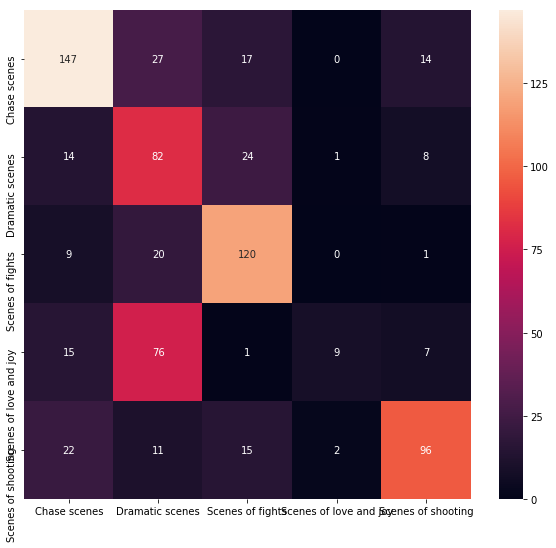

In [13]:
##Demostracion de resultados con matriz de confucion
y_pred =  vgg_transfer_learning_2.predict_generator(vgg_transfer_learning_test_generator)
y_pred_classes = np.argmax(y_pred,axis=1)
labels = vgg_transfer_learning_test_generator.classes
#compute conf mat
conf_mat = confusion_matrix (labels,y_pred_classes)
#plot the con mat
label_names = ["Chase scenes", "Dramatic scenes", "Scenes of fights", "Scenes of love and joy", "Scenes of shooting"]
f,ax = plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)
plt.show()

In [14]:
#Guardamos modelo
vgg_transfer_learning_2.save("vgg_transfer_learningfrozenmodel.h5")

In [3]:
#Funcion para generar datos de prueba
def data_generator(framefolder):
    
    test_datagen = ImageDataGenerator(rescale = 1./255)
    datagen = test_datagen.flow_from_directory(framefolder,
                                            target_size = (224, 224),
                                            batch_size = 4,
                                            shuffle=False)
    return datagen


In [ ]:
#Siguiente codigo corta los videos en fotogramas y guarda en carpetas elejidas 
videofolder_chase1 = ["new_data/video/Chase/Chase1.mp4"]
framefolder_chase1 = ["new_data/frames/video data1/chase1"]
make_frames(videofolder_chase1, framefolder_chase1)

videofolder_chase2 = ["new_data/video/Chase/Chase2.mp4"]
framefolder_chase2 = ["new_data/frames/video data2/chase2"]
make_frames(videofolder_chase2, framefolder_chase2)

videofolder_drama1 = ["new_data/video/Drama/Drama1.mp4"]
framefolder_drama1 = ["new_data/frames/video data1/drama1"]
make_frames(videofolder_drama1, framefolder_drama1)

videofolder_drama2 = ["new_data/video/Drama/Drama2.mp4"]
framefolder_drama2 = ["new_data/frames/video data2/drama2"]
make_frames(videofolder_drama2, framefolder_drama2)

videofolder_fight1 = ["new_data/video/Fight/Fight1.mp4"]
framefolder_fight1 = ["new_data/frames/video data1/fight1"]
make_frames(videofolder_fight1, framefolder_fight1)

videofolder_fight2 = ["new_data/video/Fight/Fight2.mp4"]
framefolder_fight2 = ["new_data/frames/video data2/fight2"]
make_frames(videofolder_fight2, framefolder_fight2)

videofolder_love_and_joy1 = ["new_data/video/Love and joy/Love and joy1.mp4"]
framefolder_love_and_joy1 = ["new_data/frames/video data1/love and joy1"]
make_frames(videofolder_love_and_joy1, framefolder_love_and_joy1)

videofolder_love_and_joy2 = ["new_data/video/Love and joy/Love and joy2.mp4"]
framefolder_love_and_joy2 = ["new_data/frames/video data2/love and joy2"]
make_frames(videofolder_love_and_joy2, framefolder_love_and_joy2)

videofolder_shooting1 = ["new_data/video/Shooting/Shooting1.mp4"]
framefolder_shooting1 = ["new_data/frames/video data1/shooting1"]
make_frames(videofolder_shooting1, framefolder_shooting1)

videofolder_shooting2 = ["new_data/video/Shooting/Shooting2.mp4"]
framefolder_shooting2 = ["new_data/frames/video data2/shooting2"]
make_frames(videofolder_shooting2, framefolder_shooting2)

In [4]:
#Esta función devuelve la ruta a la foto que el modelo ha definido en una de las clases.
def show_score(predict_model, framefolders):    
    
    num_files = []
    
    for folder in framefolders:
        num_files.append(len([f for f in os.listdir(folder)
                if os.path.isfile(os.path.join(folder, f))]))
    
    len_1 = num_files[0]
    len_2 = num_files[0]+num_files[1]
    len_3 = num_files[0]+num_files[1]+num_files[2]
    len_4 = num_files[0]+num_files[1]+num_files[2]+num_files[3]
    len_5 = num_files[0]+num_files[1]+num_files[2]+num_files[3]+num_files[4]
    
    b = 0
    c = 0
    d = 0
    e = 0

    chase_frames = []
    drama_frames= []
    fights_frames = []
    love_and_joy_frames = []
    shooting_frames = []
    
    example_num = []

    for i in range(len(predict_model)):
        max_value = max(predict_model[i])
        max_index = np.where(predict_model[i] == max_value)
        example_num.append([i, max_index[0][0]])
    for i, answer in example_num:
        
        if i < len_1:
            if answer == 0:
                chase_frame = "{}/frame{}.jpg".format(framefolders[0],i+1)
                chase_frames.append(chase_frame)

            elif answer == 1:
                drama_frame = "{}/frame{}.jpg".format(framefolders[0], i+1)
                drama_frames.append(drama_frame)

            elif answer == 2:
                fights_frame = "{}/frame{}.jpg".format(framefolders[0], i+1)
                fights_frames.append(fights_frame)

            elif answer == 3:
                love_and_joy_frame = "{}/frame{}.jpg".format(framefolders[0], i+1)
                love_and_joy_frames.append(love_and_joy_frame)

            elif answer == 4:
                shooting_frame = "{}/frame{}.jpg".format(framefolders[0], i+1)
                shooting_frames.append(shooting_frame)

                
        elif i > len_1 and i <= len_2:
            b += 1
            if answer == 0:
                chase_frame = "{}/frame{}.jpg".format(framefolders[1], b)
                chase_frames.append(chase_frame)
            elif answer == 1:
                drama_frame = "{}/frame{}.jpg".format(framefolders[1], b)
                drama_frames.append(drama_frame)
            elif answer == 2:
                fights_frame = "{}/frame{}.jpg".format(framefolders[1], b)
                fights_frames.append(fights_frame)
            elif answer == 3:
                love_and_joy_frame = "{}/frame{}.jpg".format(framefolders[1], b)
                love_and_joy_frames.append(love_and_joy_frame)
            elif answer == 4:
                shooting_frame = "{}/frame{}.jpg".format(framefolders[1], b)
                shooting_frames.append(shooting_frame)
                
        elif i > len_2 and i <= len_3:
            c += 1
            if answer == 0:
                chase_frame = "{}/frame{}.jpg".format(framefolders[2], c)
                chase_frames.append(chase_frame)
            elif answer == 1:
                drama_frame = "{}/frame{}.jpg".format(framefolders[2], c)
                drama_frames.append(drama_frame)
            elif answer == 2:
                fights_frame = "{}/frame{}.jpg".format(framefolders[2], c)
                fights_frames.append(fights_frame)
            elif answer == 3:
                love_and_joy_frame = "{}/frame{}.jpg".format(framefolders[2], c)
                love_and_joy_frames.append(love_and_joy_frame)
            elif answer == 4:
                shooting_frame = "{}/frame{}.jpg".format(framefolders[2], c)
                shooting_frames.append(shooting_frame)
                
        elif i > len_3 and i <= len_4:
            d += 1
            if answer == 0:
                chase_frame = "{}/frame{}.jpg".format(framefolders[3], d)
                chase_frames.append(chase_frame)
            elif answer == 1:
                drama_frame = "{}/frame{}.jpg".format(framefolders[3], d)
                drama_frames.append(drama_frame)
            elif answer == 2:
                fights_frame = "{}/frame{}.jpg".format(framefolders[3], d)
                fights_frames.append(fights_frame)
            elif answer == 3:
                love_and_joy_frame = "{}/frame{}.jpg".format(framefolders[3], d)
                love_and_joy_frames.append(love_and_joy_frame)
            elif answer == 4:
                shooting_frame = "{}/frame{}.jpg".format(framefolders[3], d)
                shooting_frames.append(shooting_frame)
                
        elif i > len_4 and i <= len_5:
            e += 1
            if answer == 0:
                chase_frame = "{}/frame{}.jpg".format(framefolders[4], e)
                chase_frames.append(chase_frame)
            elif answer == 1:
                drama_frame = "{}/frame{}.jpg".format(framefolders[4], e)
                drama_frames.append(drama_frame)
            elif answer == 2:
                fights_frame = "{}/frame{}.jpg".format(framefolders[4], e)
                fights_frames.append(fights_frame)
            elif answer == 3:
                love_and_joy_frame = "{}/frame{}.jpg".format(framefolders[4], e)
                love_and_joy_frames.append(love_and_joy_frame)
            elif answer == 4:
                shooting_frame = "{}/frame{}.jpg".format(framefolders[4], e)
                shooting_frames.append(shooting_frame)

    return chase_frames, drama_frames, fights_frames, love_and_joy_frames, shooting_frames

In [5]:
#Esta funcion nos permite crear collages

def create_collage(framefolder_to_save, collage_num, width, height, listofimages):

    if not os.path.exists(framefolder_to_save):
        os.mkdir(framefolder_to_save)
    
    cols = 6
    rows = int(len(listofimages)/cols)+1
    thumbnail_width = width//cols
    thumbnail_height = height//rows
    size = thumbnail_width, thumbnail_height
    new_im = Image.new('RGB', (width, height))
    ims = []
    for p in listofimages:
        print(p)
        im = Image.open(p)
        im.thumbnail(size)
        ims.append(im)
    i = 0
    x = 0
    y = 0
    for col in range(cols):
        for row in range(rows):
            if i < len(listofimages):
                print(i, x, y)
                new_im.paste(ims[i], (x, y))
                i += 1
                y += thumbnail_height
        x += thumbnail_width
        y = 0

    new_im.save("{}Collage{}.jpg".format(framefolder_to_save,collage_num))


In [6]:
#Esta función devuelve el resultado obtenido al pasar nuevos datos a través del modelo entrenado seleccionado.
def generator_model_results(model, folder):
    loss = []
    accuracy = []
    data = data_generator(folder)
    final_result = model.predict_generator(data)
    loss, accuracy = model.evaluate_generator(data, verbose=0)
    return final_result, loss, accuracy, data

In [7]:
#Carpetas con videos nuevos
videodata1 = ("new_data/frames/video data1/")
videodata2 = ("new_data/frames/video data2/")

In [8]:
#==========================================
#Cargamos modelo entrenado CNN

CNN_loaded_model = load_model('CNN_model.h5')

CNN_loaded_model.compile(loss='categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics=['accuracy'])

In [9]:
cnn_score_video1, loss_video1, accuracy_video1, data_video1 = generator_model_results(CNN_loaded_model, videodata1)
print("Loss: ", loss_video1)
print("Accuracy: ", accuracy_video1)

Found 870 images belonging to 5 classes.
Loss:  3.6654886064858276
Accuracy:  0.23908045977011494


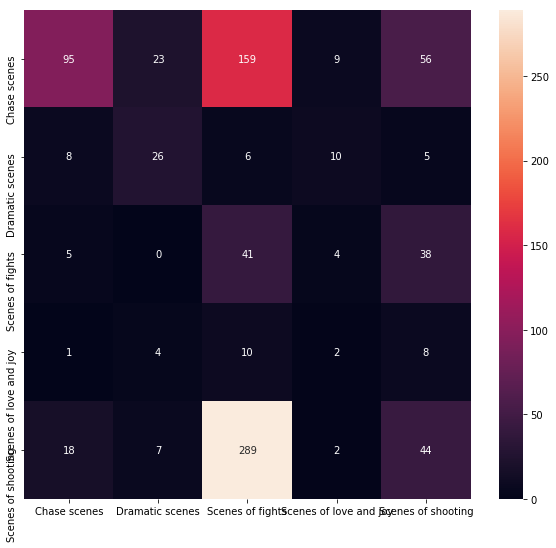

In [10]:
y_pred = cnn_score_video1
y_pred_classes = np.argmax(y_pred,axis=1)
labels = data_video1.classes
#compute conf mat
conf_mat = confusion_matrix (labels,y_pred_classes)
#plot the con mat
label_names = ["Chase scenes", "Dramatic scenes", "Scenes of fights", "Scenes of love and joy", "Scenes of shooting"]
f,ax = plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)
plt.show()

In [11]:
#Creamos collages de fotos, un collage por clase. Cada collage muestra las fotos que el modelo ha definido en una de las clases.
#Collage1 - chase scenes
#Collage2 - dramatic scenes
#Collage3 - scenes of fight
#Collage4 - scenes of love and joy
#Collage5 - scenes of shooting

framefolder = ('new_data/frames/video data1/chase1', 'new_data/frames/video data1/drama1',
              'new_data/frames/video data1/fight1', 'new_data/frames/video data1/love_and_joy1',
              'new_data/frames/video data1/shooting1')
chase_frames, drama_frames, fights_frames, love_and_joy_frames, shooting_frames = show_score(cnn_score_video1, framefolder)

chase = create_collage("Collage results//cnn_video data1//", 1, 1920, 1080, chase_frames)

drama = create_collage("Collage results//cnn_video data1//", 2, 1920, 1080, drama_frames)

fights = create_collage("Collage results//cnn_video data1//", 3, 1920, 1080, fights_frames)

love_and_joy = create_collage("Collage results//cnn_video data1//", 4, 1920, 1080, love_and_joy_frames)

shooting = create_collage("Collage results//cnn_video data1//", 5, 1920, 1080, shooting_frames)

new_data/frames/video data1/chase1/frame2.jpg
new_data/frames/video data1/chase1/frame3.jpg
new_data/frames/video data1/chase1/frame28.jpg
new_data/frames/video data1/chase1/frame32.jpg
new_data/frames/video data1/chase1/frame33.jpg
new_data/frames/video data1/chase1/frame34.jpg
new_data/frames/video data1/chase1/frame36.jpg
new_data/frames/video data1/chase1/frame37.jpg
new_data/frames/video data1/chase1/frame38.jpg
new_data/frames/video data1/chase1/frame39.jpg
new_data/frames/video data1/chase1/frame40.jpg
new_data/frames/video data1/chase1/frame41.jpg
new_data/frames/video data1/chase1/frame42.jpg
new_data/frames/video data1/chase1/frame43.jpg
new_data/frames/video data1/chase1/frame44.jpg
new_data/frames/video data1/chase1/frame56.jpg
new_data/frames/video data1/chase1/frame58.jpg
new_data/frames/video data1/chase1/frame59.jpg
new_data/frames/video data1/chase1/frame67.jpg
new_data/frames/video data1/chase1/frame78.jpg
new_data/frames/video data1/chase1/frame79.jpg
new_data/frames

40 1280 0
41 1280 108
42 1280 216
43 1280 324
44 1280 432
45 1280 540
46 1280 648
47 1280 756
48 1280 864
49 1280 972
50 1600 0
51 1600 108
52 1600 216
53 1600 324
54 1600 432
55 1600 540
56 1600 648
57 1600 756
58 1600 864
new_data/frames/video data1/chase1/frame1.jpg
new_data/frames/video data1/chase1/frame4.jpg
new_data/frames/video data1/chase1/frame5.jpg
new_data/frames/video data1/chase1/frame6.jpg
new_data/frames/video data1/chase1/frame7.jpg
new_data/frames/video data1/chase1/frame8.jpg
new_data/frames/video data1/chase1/frame9.jpg
new_data/frames/video data1/chase1/frame10.jpg
new_data/frames/video data1/chase1/frame11.jpg
new_data/frames/video data1/chase1/frame12.jpg
new_data/frames/video data1/chase1/frame13.jpg
new_data/frames/video data1/chase1/frame14.jpg
new_data/frames/video data1/chase1/frame15.jpg
new_data/frames/video data1/chase1/frame16.jpg
new_data/frames/video data1/chase1/frame18.jpg
new_data/frames/video data1/chase1/frame20.jpg
new_data/frames/video data1/cha

new_data/frames/video data1/shooting1/frame66.jpg
new_data/frames/video data1/shooting1/frame67.jpg
new_data/frames/video data1/shooting1/frame68.jpg
new_data/frames/video data1/shooting1/frame69.jpg
new_data/frames/video data1/shooting1/frame70.jpg
new_data/frames/video data1/shooting1/frame71.jpg
new_data/frames/video data1/shooting1/frame72.jpg
new_data/frames/video data1/shooting1/frame73.jpg
new_data/frames/video data1/shooting1/frame74.jpg
new_data/frames/video data1/shooting1/frame75.jpg
new_data/frames/video data1/shooting1/frame76.jpg
new_data/frames/video data1/shooting1/frame77.jpg
new_data/frames/video data1/shooting1/frame79.jpg
new_data/frames/video data1/shooting1/frame80.jpg
new_data/frames/video data1/shooting1/frame81.jpg
new_data/frames/video data1/shooting1/frame84.jpg
new_data/frames/video data1/shooting1/frame87.jpg
new_data/frames/video data1/shooting1/frame89.jpg
new_data/frames/video data1/shooting1/frame90.jpg
new_data/frames/video data1/shooting1/frame92.jpg


new_data/frames/video data1/shooting1/frame277.jpg
new_data/frames/video data1/shooting1/frame279.jpg
new_data/frames/video data1/shooting1/frame280.jpg
new_data/frames/video data1/shooting1/frame282.jpg
new_data/frames/video data1/shooting1/frame283.jpg
new_data/frames/video data1/shooting1/frame284.jpg
new_data/frames/video data1/shooting1/frame285.jpg
new_data/frames/video data1/shooting1/frame286.jpg
new_data/frames/video data1/shooting1/frame287.jpg
new_data/frames/video data1/shooting1/frame288.jpg
new_data/frames/video data1/shooting1/frame289.jpg
new_data/frames/video data1/shooting1/frame290.jpg
new_data/frames/video data1/shooting1/frame294.jpg
new_data/frames/video data1/shooting1/frame300.jpg
new_data/frames/video data1/shooting1/frame301.jpg
new_data/frames/video data1/shooting1/frame305.jpg
new_data/frames/video data1/shooting1/frame311.jpg
new_data/frames/video data1/shooting1/frame312.jpg
new_data/frames/video data1/shooting1/frame313.jpg
new_data/frames/video data1/sho

new_data/frames/video data1/chase1/frame222.jpg
new_data/frames/video data1/chase1/frame235.jpg
new_data/frames/video data1/chase1/frame238.jpg
new_data/frames/video data1/chase1/frame244.jpg
new_data/frames/video data1/chase1/frame245.jpg
new_data/frames/video data1/chase1/frame246.jpg
new_data/frames/video data1/chase1/frame247.jpg
new_data/frames/video data1/chase1/frame258.jpg
new_data/frames/video data1/chase1/frame259.jpg
new_data/frames/video data1/chase1/frame261.jpg
new_data/frames/video data1/chase1/frame262.jpg
new_data/frames/video data1/chase1/frame265.jpg
new_data/frames/video data1/chase1/frame266.jpg
new_data/frames/video data1/chase1/frame270.jpg
new_data/frames/video data1/chase1/frame271.jpg
new_data/frames/video data1/chase1/frame276.jpg
new_data/frames/video data1/chase1/frame277.jpg
new_data/frames/video data1/chase1/frame287.jpg
new_data/frames/video data1/chase1/frame288.jpg
new_data/frames/video data1/chase1/frame289.jpg
new_data/frames/video data1/chase1/frame

In [12]:
cnn_score_video2, loss_video2, accuracy_video2, data_video2 = generator_model_results(CNN_loaded_model, videodata2)
print("Loss: ", loss_video2)
print("Accuracy: ", accuracy_video2)

Found 722 images belonging to 5 classes.
Loss:  4.506390676699538
Accuracy:  0.1772853185595568


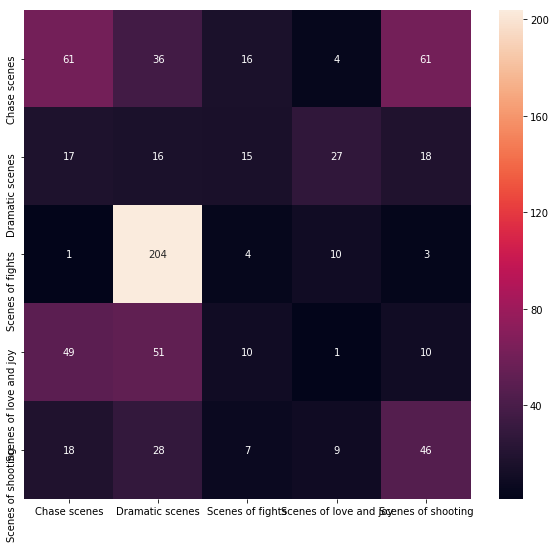

In [13]:
y_pred = cnn_score_video2
y_pred_classes = np.argmax(y_pred,axis=1)
labels = data_video2.classes
#compute conf mat
conf_mat = confusion_matrix (labels,y_pred_classes)
#plot the con mat
label_names = ["Chase scenes", "Dramatic scenes", "Scenes of fights", "Scenes of love and joy", "Scenes of shooting"]
f,ax = plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)
plt.show()

In [14]:
#Creamos collages de fotos, un collage por clase. Cada collage muestra las fotos que el modelo ha definido en una de las clases.
#Collage1 - chase scenes
#Collage2 - dramatic scenes
#Collage3 - scenes of fight
#Collage4 - scenes of love and joy
#Collage5 - scenes of shooting
framefolder = ('new_data/frames/video data2/chase2', 'new_data/frames/video data2/drama2',
              'new_data/frames/video data2/fight2', 'new_data/frames/video data2/love_and_joy2',
              'new_data/frames/video data2/shooting2')
chase_frames, drama_frames, fights_frames, love_and_joy_frames, shooting_frames = show_score(cnn_score_video2, framefolder)

chase = create_collage("Collage results//cnn_video data2//", 1, 1920, 1080, chase_frames)

drama = create_collage("Collage results//cnn_video data2//", 2, 1920, 1080, drama_frames)

fight = create_collage("Collage results//cnn_video data2//", 3, 1920, 1080, fights_frames)

love_and_joy = create_collage("Collage results//cnn_video data2//", 4, 1920, 1080, love_and_joy_frames)

shooting = create_collage("Collage results//cnn_video data2//", 5, 1920, 1080, shooting_frames)

new_data/frames/video data2/chase2/frame2.jpg
new_data/frames/video data2/chase2/frame4.jpg
new_data/frames/video data2/chase2/frame5.jpg
new_data/frames/video data2/chase2/frame6.jpg
new_data/frames/video data2/chase2/frame9.jpg
new_data/frames/video data2/chase2/frame10.jpg
new_data/frames/video data2/chase2/frame13.jpg
new_data/frames/video data2/chase2/frame14.jpg
new_data/frames/video data2/chase2/frame20.jpg
new_data/frames/video data2/chase2/frame24.jpg
new_data/frames/video data2/chase2/frame34.jpg
new_data/frames/video data2/chase2/frame36.jpg
new_data/frames/video data2/chase2/frame37.jpg
new_data/frames/video data2/chase2/frame38.jpg
new_data/frames/video data2/chase2/frame45.jpg
new_data/frames/video data2/chase2/frame46.jpg
new_data/frames/video data2/chase2/frame69.jpg
new_data/frames/video data2/chase2/frame70.jpg
new_data/frames/video data2/chase2/frame72.jpg
new_data/frames/video data2/chase2/frame76.jpg
new_data/frames/video data2/chase2/frame78.jpg
new_data/frames/vi

new_data/frames/video data2/fight2/frame4.jpg
new_data/frames/video data2/fight2/frame5.jpg
new_data/frames/video data2/fight2/frame6.jpg
new_data/frames/video data2/fight2/frame10.jpg
new_data/frames/video data2/fight2/frame11.jpg
new_data/frames/video data2/fight2/frame12.jpg
new_data/frames/video data2/fight2/frame13.jpg
new_data/frames/video data2/fight2/frame14.jpg
new_data/frames/video data2/fight2/frame15.jpg
new_data/frames/video data2/fight2/frame16.jpg
new_data/frames/video data2/fight2/frame17.jpg
new_data/frames/video data2/fight2/frame18.jpg
new_data/frames/video data2/fight2/frame19.jpg
new_data/frames/video data2/fight2/frame20.jpg
new_data/frames/video data2/fight2/frame21.jpg
new_data/frames/video data2/fight2/frame22.jpg
new_data/frames/video data2/fight2/frame23.jpg
new_data/frames/video data2/fight2/frame24.jpg
new_data/frames/video data2/fight2/frame25.jpg
new_data/frames/video data2/fight2/frame27.jpg
new_data/frames/video data2/fight2/frame28.jpg
new_data/frames/

77 320 399
78 320 418
79 320 437
80 320 456
81 320 475
82 320 494
83 320 513
84 320 532
85 320 551
86 320 570
87 320 589
88 320 608
89 320 627
90 320 646
91 320 665
92 320 684
93 320 703
94 320 722
95 320 741
96 320 760
97 320 779
98 320 798
99 320 817
100 320 836
101 320 855
102 320 874
103 320 893
104 320 912
105 320 931
106 320 950
107 320 969
108 320 988
109 320 1007
110 320 1026
111 320 1045
112 640 0
113 640 19
114 640 38
115 640 57
116 640 76
117 640 95
118 640 114
119 640 133
120 640 152
121 640 171
122 640 190
123 640 209
124 640 228
125 640 247
126 640 266
127 640 285
128 640 304
129 640 323
130 640 342
131 640 361
132 640 380
133 640 399
134 640 418
135 640 437
136 640 456
137 640 475
138 640 494
139 640 513
140 640 532
141 640 551
142 640 570
143 640 589
144 640 608
145 640 627
146 640 646
147 640 665
148 640 684
149 640 703
150 640 722
151 640 741
152 640 760
153 640 779
154 640 798
155 640 817
156 640 836
157 640 855
158 640 874
159 640 893
160 640 912
161 640 931
162 640

new_data/frames/video data2/chase2/frame73.jpg
new_data/frames/video data2/chase2/frame75.jpg
new_data/frames/video data2/chase2/frame79.jpg
new_data/frames/video data2/chase2/frame80.jpg
new_data/frames/video data2/chase2/frame85.jpg
new_data/frames/video data2/chase2/frame86.jpg
new_data/frames/video data2/chase2/frame87.jpg
new_data/frames/video data2/chase2/frame89.jpg
new_data/frames/video data2/chase2/frame91.jpg
new_data/frames/video data2/chase2/frame93.jpg
new_data/frames/video data2/chase2/frame94.jpg
new_data/frames/video data2/chase2/frame95.jpg
new_data/frames/video data2/chase2/frame96.jpg
new_data/frames/video data2/chase2/frame97.jpg
new_data/frames/video data2/chase2/frame98.jpg
new_data/frames/video data2/chase2/frame99.jpg
new_data/frames/video data2/chase2/frame100.jpg
new_data/frames/video data2/chase2/frame101.jpg
new_data/frames/video data2/chase2/frame102.jpg
new_data/frames/video data2/chase2/frame103.jpg
new_data/frames/video data2/chase2/frame104.jpg
new_data

In [15]:
#==========================================
#Cargamos modelo entrenado usando tecnica transfer learning

vgg_tl1_loaded_model = load_model('vgg_transfer_learningfrozenmodel.h5')
# evaluate loaded model on test data
vgg_tl1_loaded_model.compile(loss='categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics=['accuracy'])

In [16]:
vgg_tl1_score_video1, loss_video1, accuracy_video1, data_video1 = generator_model_results(vgg_tl1_loaded_model, videodata1)
print("Loss: ", loss_video1)
print("Accuracy: ", accuracy_video1)

Found 870 images belonging to 5 classes.
Loss:  2.168720293475379
Accuracy:  0.2827586206896552


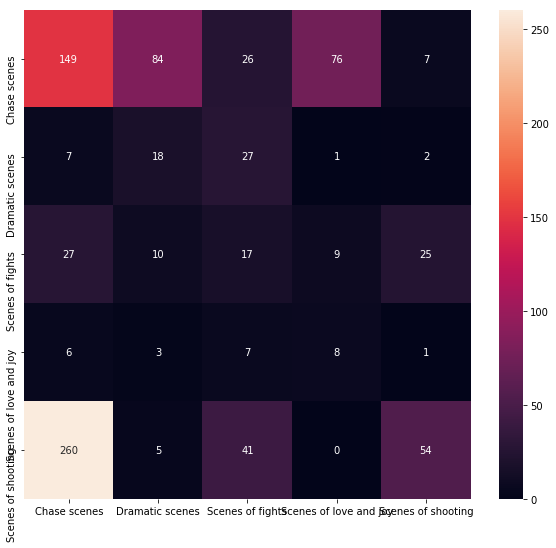

In [17]:
y_pred = vgg_tl1_score_video1
y_pred_classes = np.argmax(y_pred,axis=1)
labels = data_video1.classes
#compute conf mat
conf_mat = confusion_matrix (labels,y_pred_classes)
#plot the con mat
label_names = ["Chase scenes", "Dramatic scenes", "Scenes of fights", "Scenes of love and joy", "Scenes of shooting"]
f,ax = plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)
plt.show()

In [18]:
#Creamos collages de fotos, un collage por clase. Cada collage muestra las fotos que el modelo ha definido en una de las clases.
#Collage1 - chase scenes
#Collage2 - dramatic scenes
#Collage3 - scenes of fight
#Collage4 - scenes of love and joy
#Collage5 - scenes of shooting

framefolder = ('new_data/frames/video data1/chase1', 'new_data/frames/video data1/drama1',
              'new_data/frames/video data1/fight1', 'new_data/frames/video data1/love_and_joy1',
              'new_data/frames/video data1/shooting1')
chase_frames, drama_frames, fights_frames, love_and_joy_frames, shooting_frames = show_score(vgg_tl1_score_video1, framefolder)

chase = create_collage("Collage results//vgg_tl1_video data1//", 1, 1920, 1080, chase_frames)

drama = create_collage("Collage results//vgg_tl1_video data1//", 2, 1920, 1080, drama_frames)

fights = create_collage("Collage results//vgg_tl1_video data1//", 3, 1920, 1080, fights_frames)

love_and_joy = create_collage("Collage results//vgg_tl1_video data1//", 4, 1920, 1080, love_and_joy_frames)

shooting = create_collage("Collage results//vgg_tl1_video data1//", 5, 1920, 1080, shooting_frames)

new_data/frames/video data1/chase1/frame4.jpg
new_data/frames/video data1/chase1/frame5.jpg
new_data/frames/video data1/chase1/frame6.jpg
new_data/frames/video data1/chase1/frame8.jpg
new_data/frames/video data1/chase1/frame9.jpg
new_data/frames/video data1/chase1/frame32.jpg
new_data/frames/video data1/chase1/frame33.jpg
new_data/frames/video data1/chase1/frame51.jpg
new_data/frames/video data1/chase1/frame55.jpg
new_data/frames/video data1/chase1/frame56.jpg
new_data/frames/video data1/chase1/frame58.jpg
new_data/frames/video data1/chase1/frame64.jpg
new_data/frames/video data1/chase1/frame65.jpg
new_data/frames/video data1/chase1/frame67.jpg
new_data/frames/video data1/chase1/frame70.jpg
new_data/frames/video data1/chase1/frame71.jpg
new_data/frames/video data1/chase1/frame72.jpg
new_data/frames/video data1/chase1/frame74.jpg
new_data/frames/video data1/chase1/frame75.jpg
new_data/frames/video data1/chase1/frame76.jpg
new_data/frames/video data1/chase1/frame78.jpg
new_data/frames/vi

new_data/frames/video data1/shooting1/frame134.jpg
new_data/frames/video data1/shooting1/frame135.jpg
new_data/frames/video data1/shooting1/frame137.jpg
new_data/frames/video data1/shooting1/frame138.jpg
new_data/frames/video data1/shooting1/frame139.jpg
new_data/frames/video data1/shooting1/frame140.jpg
new_data/frames/video data1/shooting1/frame141.jpg
new_data/frames/video data1/shooting1/frame142.jpg
new_data/frames/video data1/shooting1/frame143.jpg
new_data/frames/video data1/shooting1/frame144.jpg
new_data/frames/video data1/shooting1/frame146.jpg
new_data/frames/video data1/shooting1/frame147.jpg
new_data/frames/video data1/shooting1/frame148.jpg
new_data/frames/video data1/shooting1/frame149.jpg
new_data/frames/video data1/shooting1/frame150.jpg
new_data/frames/video data1/shooting1/frame151.jpg
new_data/frames/video data1/shooting1/frame152.jpg
new_data/frames/video data1/shooting1/frame153.jpg
new_data/frames/video data1/shooting1/frame154.jpg
new_data/frames/video data1/sho

95 320 280
96 320 294
97 320 308
98 320 322
99 320 336
100 320 350
101 320 364
102 320 378
103 320 392
104 320 406
105 320 420
106 320 434
107 320 448
108 320 462
109 320 476
110 320 490
111 320 504
112 320 518
113 320 532
114 320 546
115 320 560
116 320 574
117 320 588
118 320 602
119 320 616
120 320 630
121 320 644
122 320 658
123 320 672
124 320 686
125 320 700
126 320 714
127 320 728
128 320 742
129 320 756
130 320 770
131 320 784
132 320 798
133 320 812
134 320 826
135 320 840
136 320 854
137 320 868
138 320 882
139 320 896
140 320 910
141 320 924
142 320 938
143 320 952
144 320 966
145 320 980
146 320 994
147 320 1008
148 320 1022
149 320 1036
150 640 0
151 640 14
152 640 28
153 640 42
154 640 56
155 640 70
156 640 84
157 640 98
158 640 112
159 640 126
160 640 140
161 640 154
162 640 168
163 640 182
164 640 196
165 640 210
166 640 224
167 640 238
168 640 252
169 640 266
170 640 280
171 640 294
172 640 308
173 640 322
174 640 336
175 640 350
176 640 364
177 640 378
178 640 392
179

new_data/frames/video data1/drama1/frame33.jpg
new_data/frames/video data1/drama1/frame34.jpg
new_data/frames/video data1/drama1/frame37.jpg
new_data/frames/video data1/drama1/frame40.jpg
new_data/frames/video data1/drama1/frame42.jpg
new_data/frames/video data1/drama1/frame44.jpg
new_data/frames/video data1/drama1/frame45.jpg
new_data/frames/video data1/drama1/frame51.jpg
new_data/frames/video data1/drama1/frame52.jpg
new_data/frames/video data1/drama1/frame53.jpg
new_data/frames/video data1/drama1/frame54.jpg
new_data/frames/video data1/fight1/frame3.jpg
new_data/frames/video data1/fight1/frame9.jpg
new_data/frames/video data1/fight1/frame10.jpg
new_data/frames/video data1/fight1/frame12.jpg
new_data/frames/video data1/fight1/frame13.jpg
new_data/frames/video data1/fight1/frame15.jpg
new_data/frames/video data1/fight1/frame16.jpg
new_data/frames/video data1/fight1/frame17.jpg
new_data/frames/video data1/fight1/frame20.jpg
new_data/frames/video data1/fight1/frame30.jpg
new_data/frames

new_data/frames/video data1/chase1/frame10.jpg
new_data/frames/video data1/chase1/frame11.jpg
new_data/frames/video data1/chase1/frame14.jpg
new_data/frames/video data1/chase1/frame15.jpg
new_data/frames/video data1/chase1/frame19.jpg
new_data/frames/video data1/chase1/frame20.jpg
new_data/frames/video data1/chase1/frame23.jpg
new_data/frames/video data1/drama1/frame25.jpg
new_data/frames/video data1/drama1/frame39.jpg
new_data/frames/video data1/drama1/frame55.jpg
new_data/frames/video data1/fight1/frame1.jpg
new_data/frames/video data1/fight1/frame2.jpg
new_data/frames/video data1/fight1/frame14.jpg
new_data/frames/video data1/fight1/frame21.jpg
new_data/frames/video data1/fight1/frame23.jpg
new_data/frames/video data1/fight1/frame24.jpg
new_data/frames/video data1/fight1/frame26.jpg
new_data/frames/video data1/fight1/frame27.jpg
new_data/frames/video data1/fight1/frame37.jpg
new_data/frames/video data1/fight1/frame39.jpg
new_data/frames/video data1/fight1/frame42.jpg
new_data/frames

In [19]:
vgg_tl1_score_video2, loss_video2, accuracy_video2, data_video2 = generator_model_results(vgg_tl1_loaded_model, videodata2)
print("Loss: ", loss_video2)
print("Accuracy: ", accuracy_video2)

Found 722 images belonging to 5 classes.
Loss:  2.6822968699099943
Accuracy:  0.3628808864265928


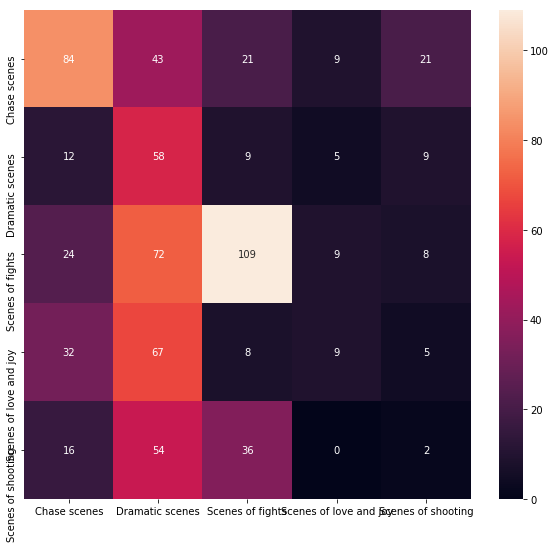

In [20]:
y_pred = vgg_tl1_score_video2
y_pred_classes = np.argmax(y_pred,axis=1)
labels = data_video2.classes
#compute conf mat
conf_mat = confusion_matrix (labels,y_pred_classes)
#plot the con mat
label_names = ["Chase scenes", "Dramatic scenes", "Scenes of fights", "Scenes of love and joy", "Scenes of shooting"]
f,ax = plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)
plt.show()

In [21]:
#Creamos collages de fotos, un collage por clase. Cada collage muestra las fotos que el modelo ha definido en una de las clases.
#Collage1 - chase scenes
#Collage2 - dramatic scenes
#Collage3 - scenes of fight
#Collage4 - scenes of love and joy
#Collage5 - scenes of shooting

framefolder = ('new_data/frames/video data2/chase2', 'new_data/frames/video data2/drama2',
              'new_data/frames/video data2/fight2', 'new_data/frames/video data2/love_and_joy2',
              'new_data/frames/video data2/shooting2')
chase_frames, drama_frames, fights_frames, love_and_joy_frames, shooting_frames = show_score(vgg_tl1_score_video2, framefolder)

chase = create_collage("Collage results//vgg_tl1_video data2//", 1, 1920, 1080, chase_frames)

drama = create_collage("Collage results//vgg_tl1_video data2//", 2, 1920, 1080, drama_frames)

fights = create_collage("Collage results//vgg_tl1_video data2//", 3, 1920, 1080, fights_frames)

love_and_joy = create_collage("Collage results//vgg_tl1_video data2//", 4, 1920, 1080, love_and_joy_frames)

shooting = create_collage("Collage results//vgg_tl1_video data2//", 5, 1920, 1080, shooting_frames)

new_data/frames/video data2/chase2/frame1.jpg
new_data/frames/video data2/chase2/frame2.jpg
new_data/frames/video data2/chase2/frame3.jpg
new_data/frames/video data2/chase2/frame5.jpg
new_data/frames/video data2/chase2/frame6.jpg
new_data/frames/video data2/chase2/frame7.jpg
new_data/frames/video data2/chase2/frame13.jpg
new_data/frames/video data2/chase2/frame20.jpg
new_data/frames/video data2/chase2/frame23.jpg
new_data/frames/video data2/chase2/frame24.jpg
new_data/frames/video data2/chase2/frame25.jpg
new_data/frames/video data2/chase2/frame29.jpg
new_data/frames/video data2/chase2/frame30.jpg
new_data/frames/video data2/chase2/frame32.jpg
new_data/frames/video data2/chase2/frame33.jpg
new_data/frames/video data2/chase2/frame34.jpg
new_data/frames/video data2/chase2/frame35.jpg
new_data/frames/video data2/chase2/frame36.jpg
new_data/frames/video data2/chase2/frame37.jpg
new_data/frames/video data2/chase2/frame38.jpg
new_data/frames/video data2/chase2/frame40.jpg
new_data/frames/vid

new_data/frames/video data2/chase2/frame149.jpg
new_data/frames/video data2/chase2/frame150.jpg
new_data/frames/video data2/chase2/frame163.jpg
new_data/frames/video data2/chase2/frame165.jpg
new_data/frames/video data2/chase2/frame167.jpg
new_data/frames/video data2/chase2/frame170.jpg
new_data/frames/video data2/chase2/frame177.jpg
new_data/frames/video data2/drama2/frame1.jpg
new_data/frames/video data2/drama2/frame2.jpg
new_data/frames/video data2/drama2/frame3.jpg
new_data/frames/video data2/drama2/frame4.jpg
new_data/frames/video data2/drama2/frame5.jpg
new_data/frames/video data2/drama2/frame6.jpg
new_data/frames/video data2/drama2/frame7.jpg
new_data/frames/video data2/drama2/frame8.jpg
new_data/frames/video data2/drama2/frame10.jpg
new_data/frames/video data2/drama2/frame11.jpg
new_data/frames/video data2/drama2/frame12.jpg
new_data/frames/video data2/drama2/frame13.jpg
new_data/frames/video data2/drama2/frame15.jpg
new_data/frames/video data2/drama2/frame16.jpg
new_data/frame

149 640 1029
150 960 0
151 960 21
152 960 42
153 960 63
154 960 84
155 960 105
156 960 126
157 960 147
158 960 168
159 960 189
160 960 210
161 960 231
162 960 252
163 960 273
164 960 294
165 960 315
166 960 336
167 960 357
168 960 378
169 960 399
170 960 420
171 960 441
172 960 462
173 960 483
174 960 504
175 960 525
176 960 546
177 960 567
178 960 588
179 960 609
180 960 630
181 960 651
182 960 672
183 960 693
184 960 714
185 960 735
186 960 756
187 960 777
188 960 798
189 960 819
190 960 840
191 960 861
192 960 882
193 960 903
194 960 924
195 960 945
196 960 966
197 960 987
198 960 1008
199 960 1029
200 1280 0
201 1280 21
202 1280 42
203 1280 63
204 1280 84
205 1280 105
206 1280 126
207 1280 147
208 1280 168
209 1280 189
210 1280 210
211 1280 231
212 1280 252
213 1280 273
214 1280 294
215 1280 315
216 1280 336
217 1280 357
218 1280 378
219 1280 399
220 1280 420
221 1280 441
222 1280 462
223 1280 483
224 1280 504
225 1280 525
226 1280 546
227 1280 567
228 1280 588
229 1280 609
230 128

new_data/frames/video data2/chase2/frame51.jpg
new_data/frames/video data2/chase2/frame58.jpg
new_data/frames/video data2/chase2/frame64.jpg
new_data/frames/video data2/chase2/frame106.jpg
new_data/frames/video data2/chase2/frame130.jpg
new_data/frames/video data2/chase2/frame143.jpg
new_data/frames/video data2/drama2/frame21.jpg
new_data/frames/video data2/drama2/frame45.jpg
new_data/frames/video data2/drama2/frame46.jpg
new_data/frames/video data2/drama2/frame51.jpg
new_data/frames/video data2/drama2/frame75.jpg
new_data/frames/video data2/fight2/frame3.jpg
new_data/frames/video data2/fight2/frame15.jpg
new_data/frames/video data2/fight2/frame20.jpg
new_data/frames/video data2/fight2/frame21.jpg
new_data/frames/video data2/fight2/frame36.jpg
new_data/frames/video data2/fight2/frame160.jpg
new_data/frames/video data2/fight2/frame167.jpg
new_data/frames/video data2/fight2/frame209.jpg
new_data/frames/video data2/fight2/frame220.jpg
new_data/frames/video data2/love_and_joy2/frame6.jpg
n

In [22]:
from keras.models import load_model

vgg_tl2_loaded_model = load_model('vgg_transfer_learningcaracextr.h5')
 
# evaluate loaded model on test data
vgg_tl2_loaded_model.compile(loss='categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics=['accuracy'])

In [23]:
from keras import layers
from keras import models
from keras.utils.vis_utils import plot_model
from keras.applications import VGG19

vgg19_model = VGG19(weights='imagenet',
                    include_top=False,
                    input_shape=(224, 224, 3))

In [24]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 4

def extract_test_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count,5))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = vgg19_model.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

Found 870 images belonging to 5 classes.
Loss:  2.168720293475379
Accuracy:  0.2827586206896552


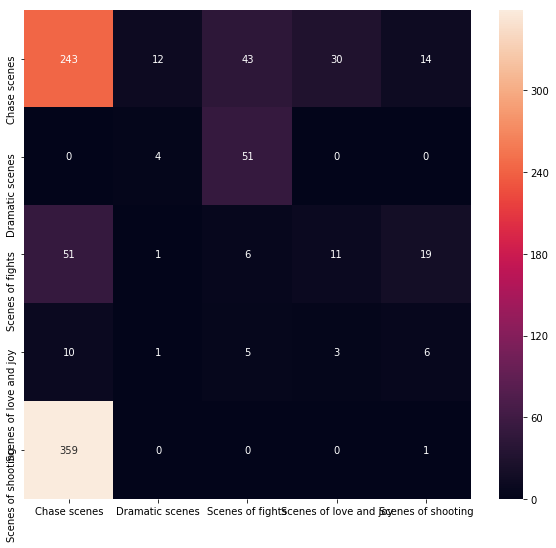

In [25]:
features, labels = extract_test_features("new_data/frames/video data1/", 870)
test_features = np.reshape(features, (870, 7 * 7 * 512))
lossvideo1, accvideo1 = vgg_tl2_loaded_model.evaluate(test_features,labels, verbose=0)
pred = vgg_tl2_loaded_model.predict(test_features)

print("Loss: ", loss_video1)
print("Accuracy: ", accuracy_video1)

y_pred_classes = np.argmax(pred,axis=1)
labels = np.argmax(labels,axis=1)
#compute conf mat
conf_mat = confusion_matrix (labels,y_pred_classes)
#plot the con mat
label_names = ["Chase scenes", "Dramatic scenes", "Scenes of fights", "Scenes of love and joy", "Scenes of shooting"]
f,ax = plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)
plt.show()

In [26]:
#Creamos collages de fotos, un collage por clase. Cada collage muestra las fotos que el modelo ha definido en una de las clases.
#Collage1 - chase scenes
#Collage2 - dramatic scenes
#Collage3 - scenes of fight
#Collage4 - scenes of love and joy
#Collage5 - scenes of shooting

framefolder = ('new_data/frames/video data1/chase1', 'new_data/frames/video data1/drama1',
              'new_data/frames/video data1/fight1', 'new_data/frames/video data1/love_and_joy1',
              'new_data/frames/video data1/shooting1')
chase_frames, drama_frames, fights_frames, love_and_joy_frames, shooting_frames = show_score(pred, framefolder)

chase = create_collage("Collage results//vgg_tl2_video data1//", 1, 1920, 1080, chase_frames)

drama = create_collage("Collage results//vgg_tl2_video data1//", 2, 1920, 1080, drama_frames)

fights = create_collage("Collage results//vgg_tl2_video data1//", 3, 1920, 1080, fights_frames)

love_and_joy = create_collage("Collage results//vgg_tl2_video data1//", 4, 1920, 1080, love_and_joy_frames)

shooting = create_collage("Collage results//vgg_tl2_video data1//", 5, 1920, 1080, shooting_frames)

new_data/frames/video data1/chase1/frame1.jpg
new_data/frames/video data1/chase1/frame4.jpg
new_data/frames/video data1/chase1/frame6.jpg
new_data/frames/video data1/chase1/frame8.jpg
new_data/frames/video data1/chase1/frame9.jpg
new_data/frames/video data1/chase1/frame10.jpg
new_data/frames/video data1/chase1/frame11.jpg
new_data/frames/video data1/chase1/frame14.jpg
new_data/frames/video data1/chase1/frame16.jpg
new_data/frames/video data1/chase1/frame18.jpg
new_data/frames/video data1/chase1/frame22.jpg
new_data/frames/video data1/chase1/frame24.jpg
new_data/frames/video data1/chase1/frame26.jpg
new_data/frames/video data1/chase1/frame27.jpg
new_data/frames/video data1/chase1/frame28.jpg
new_data/frames/video data1/chase1/frame29.jpg
new_data/frames/video data1/chase1/frame30.jpg
new_data/frames/video data1/chase1/frame31.jpg
new_data/frames/video data1/chase1/frame32.jpg
new_data/frames/video data1/chase1/frame33.jpg
new_data/frames/video data1/chase1/frame34.jpg
new_data/frames/vi

new_data/frames/video data1/chase1/frame319.jpg
new_data/frames/video data1/chase1/frame320.jpg
new_data/frames/video data1/chase1/frame321.jpg
new_data/frames/video data1/chase1/frame322.jpg
new_data/frames/video data1/chase1/frame323.jpg
new_data/frames/video data1/chase1/frame324.jpg
new_data/frames/video data1/chase1/frame325.jpg
new_data/frames/video data1/chase1/frame326.jpg
new_data/frames/video data1/chase1/frame328.jpg
new_data/frames/video data1/chase1/frame331.jpg
new_data/frames/video data1/chase1/frame332.jpg
new_data/frames/video data1/chase1/frame333.jpg
new_data/frames/video data1/chase1/frame334.jpg
new_data/frames/video data1/chase1/frame335.jpg
new_data/frames/video data1/chase1/frame336.jpg
new_data/frames/video data1/chase1/frame337.jpg
new_data/frames/video data1/chase1/frame338.jpg
new_data/frames/video data1/chase1/frame339.jpg
new_data/frames/video data1/chase1/frame340.jpg
new_data/frames/video data1/chase1/frame341.jpg
new_data/frames/video data1/chase1/frame

new_data/frames/video data1/shooting1/frame206.jpg
new_data/frames/video data1/shooting1/frame209.jpg
new_data/frames/video data1/shooting1/frame210.jpg
new_data/frames/video data1/shooting1/frame211.jpg
new_data/frames/video data1/shooting1/frame212.jpg
new_data/frames/video data1/shooting1/frame213.jpg
new_data/frames/video data1/shooting1/frame214.jpg
new_data/frames/video data1/shooting1/frame215.jpg
new_data/frames/video data1/shooting1/frame216.jpg
new_data/frames/video data1/shooting1/frame217.jpg
new_data/frames/video data1/shooting1/frame218.jpg
new_data/frames/video data1/shooting1/frame219.jpg
new_data/frames/video data1/shooting1/frame220.jpg
new_data/frames/video data1/shooting1/frame223.jpg
new_data/frames/video data1/shooting1/frame224.jpg
new_data/frames/video data1/shooting1/frame225.jpg
new_data/frames/video data1/shooting1/frame226.jpg
new_data/frames/video data1/shooting1/frame227.jpg
new_data/frames/video data1/shooting1/frame228.jpg
new_data/frames/video data1/sho

223 640 9
224 640 18
225 640 27
226 640 36
227 640 45
228 640 54
229 640 63
230 640 72
231 640 81
232 640 90
233 640 99
234 640 108
235 640 117
236 640 126
237 640 135
238 640 144
239 640 153
240 640 162
241 640 171
242 640 180
243 640 189
244 640 198
245 640 207
246 640 216
247 640 225
248 640 234
249 640 243
250 640 252
251 640 261
252 640 270
253 640 279
254 640 288
255 640 297
256 640 306
257 640 315
258 640 324
259 640 333
260 640 342
261 640 351
262 640 360
263 640 369
264 640 378
265 640 387
266 640 396
267 640 405
268 640 414
269 640 423
270 640 432
271 640 441
272 640 450
273 640 459
274 640 468
275 640 477
276 640 486
277 640 495
278 640 504
279 640 513
280 640 522
281 640 531
282 640 540
283 640 549
284 640 558
285 640 567
286 640 576
287 640 585
288 640 594
289 640 603
290 640 612
291 640 621
292 640 630
293 640 639
294 640 648
295 640 657
296 640 666
297 640 675
298 640 684
299 640 693
300 640 702
301 640 711
302 640 720
303 640 729
304 640 738
305 640 747
306 640 756
307 

new_data/frames/video data1/chase1/frame74.jpg
new_data/frames/video data1/chase1/frame91.jpg
new_data/frames/video data1/chase1/frame95.jpg
new_data/frames/video data1/chase1/frame132.jpg
new_data/frames/video data1/chase1/frame138.jpg
new_data/frames/video data1/chase1/frame198.jpg
new_data/frames/video data1/chase1/frame234.jpg
new_data/frames/video data1/chase1/frame240.jpg
new_data/frames/video data1/chase1/frame241.jpg
new_data/frames/video data1/chase1/frame268.jpg
new_data/frames/video data1/chase1/frame295.jpg
new_data/frames/video data1/chase1/frame312.jpg
new_data/frames/video data1/drama1/frame11.jpg
new_data/frames/video data1/drama1/frame26.jpg
new_data/frames/video data1/drama1/frame42.jpg
new_data/frames/video data1/fight1/frame11.jpg
new_data/frames/video data1/fight1/frame31.jpg
new_data/frames/video data1/fight1/frame33.jpg
new_data/frames/video data1/fight1/frame38.jpg
new_data/frames/video data1/fight1/frame50.jpg
new_data/frames/video data1/love_and_joy1/frame22.j

Found 722 images belonging to 5 classes.
Loss:  2.6822968699099943
Accuracy:  0.3628808864265928


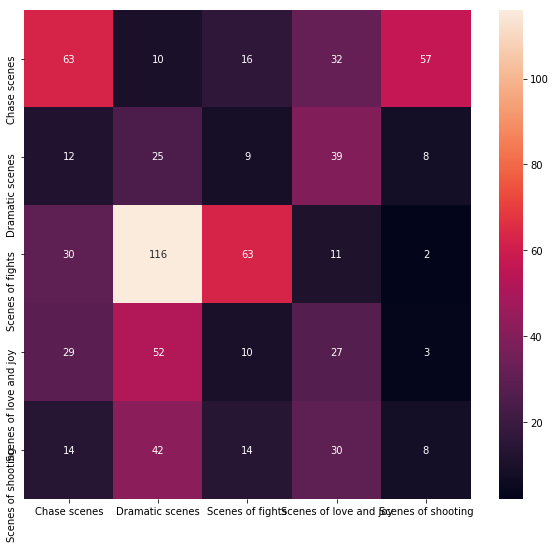

In [27]:
features, labels = extract_test_features("new_data/frames/video data2/", 722)
test_features = np.reshape(features, (722, 7 * 7 * 512))
lossvideo2, accvideo2 = vgg_tl2_loaded_model.evaluate(test_features,labels, verbose=0)
pred = vgg_tl2_loaded_model.predict(test_features)

print("Loss: ", loss_video2)
print("Accuracy: ", accuracy_video2)

y_pred_classes = np.argmax(pred,axis=1)
labels = np.argmax(labels,axis=1)
#compute conf mat
conf_mat = confusion_matrix (labels,y_pred_classes)
#plot the con mat
label_names = ["Chase scenes", "Dramatic scenes", "Scenes of fights", "Scenes of love and joy", "Scenes of shooting"]
f,ax = plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)
plt.show()

In [28]:
#Creamos collages de fotos, un collage por clase. Cada collage muestra las fotos que el modelo ha definido en una de las clases.
#Collage1 - chase scenes
#Collage2 - dramatic scenes
#Collage3 - scenes of fight
#Collage4 - scenes of love and joy
#Collage5 - scenes of shooting

framefolder = ('new_data/frames/video data2/chase2', 'new_data/frames/video data2/drama2',
              'new_data/frames/video data2/fight2', 'new_data/frames/video data2/love_and_joy2',
              'new_data/frames/video data2/shooting2')
chase_frames, drama_frames, fights_frames, love_and_joy_frames, shooting_frames = show_score(pred, framefolder)

chase = create_collage("Collage results//vgg_tl2_video data2//", 1, 1920, 1080, chase_frames)

drama = create_collage("Collage results//vgg_tl2_video data2//", 2, 1920, 1080, drama_frames)

fights = create_collage("Collage results//vgg_tl2_video data2//", 3, 1920, 1080, fights_frames)

love_and_joy = create_collage("Collage results//vgg_tl2_video data2//", 4, 1920, 1080, love_and_joy_frames)

shooting = create_collage("Collage results//vgg_tl2_video data2//", 5, 1920, 1080, shooting_frames)

new_data/frames/video data2/chase2/frame1.jpg
new_data/frames/video data2/chase2/frame4.jpg
new_data/frames/video data2/chase2/frame14.jpg
new_data/frames/video data2/chase2/frame18.jpg
new_data/frames/video data2/chase2/frame22.jpg
new_data/frames/video data2/chase2/frame25.jpg
new_data/frames/video data2/chase2/frame26.jpg
new_data/frames/video data2/chase2/frame29.jpg
new_data/frames/video data2/chase2/frame35.jpg
new_data/frames/video data2/chase2/frame41.jpg
new_data/frames/video data2/chase2/frame49.jpg
new_data/frames/video data2/chase2/frame53.jpg
new_data/frames/video data2/chase2/frame60.jpg
new_data/frames/video data2/chase2/frame62.jpg
new_data/frames/video data2/chase2/frame63.jpg
new_data/frames/video data2/chase2/frame64.jpg
new_data/frames/video data2/chase2/frame67.jpg
new_data/frames/video data2/chase2/frame69.jpg
new_data/frames/video data2/chase2/frame74.jpg
new_data/frames/video data2/chase2/frame77.jpg
new_data/frames/video data2/chase2/frame92.jpg
new_data/frames

new_data/frames/video data2/chase2/frame155.jpg
new_data/frames/video data2/chase2/frame159.jpg
new_data/frames/video data2/chase2/frame163.jpg
new_data/frames/video data2/chase2/frame164.jpg
new_data/frames/video data2/chase2/frame165.jpg
new_data/frames/video data2/chase2/frame169.jpg
new_data/frames/video data2/chase2/frame170.jpg
new_data/frames/video data2/chase2/frame177.jpg
new_data/frames/video data2/drama2/frame1.jpg
new_data/frames/video data2/drama2/frame6.jpg
new_data/frames/video data2/drama2/frame9.jpg
new_data/frames/video data2/drama2/frame13.jpg
new_data/frames/video data2/drama2/frame15.jpg
new_data/frames/video data2/drama2/frame17.jpg
new_data/frames/video data2/drama2/frame23.jpg
new_data/frames/video data2/drama2/frame24.jpg
new_data/frames/video data2/drama2/frame25.jpg
new_data/frames/video data2/drama2/frame28.jpg
new_data/frames/video data2/drama2/frame31.jpg
new_data/frames/video data2/drama2/frame36.jpg
new_data/frames/video data2/drama2/frame37.jpg
new_data

new_data/frames/video data2/chase2/frame90.jpg
new_data/frames/video data2/chase2/frame105.jpg
new_data/frames/video data2/chase2/frame109.jpg
new_data/frames/video data2/chase2/frame112.jpg
new_data/frames/video data2/chase2/frame118.jpg
new_data/frames/video data2/chase2/frame125.jpg
new_data/frames/video data2/chase2/frame126.jpg
new_data/frames/video data2/chase2/frame129.jpg
new_data/frames/video data2/chase2/frame136.jpg
new_data/frames/video data2/chase2/frame143.jpg
new_data/frames/video data2/chase2/frame150.jpg
new_data/frames/video data2/chase2/frame156.jpg
new_data/frames/video data2/chase2/frame162.jpg
new_data/frames/video data2/chase2/frame167.jpg
new_data/frames/video data2/drama2/frame3.jpg
new_data/frames/video data2/drama2/frame19.jpg
new_data/frames/video data2/drama2/frame20.jpg
new_data/frames/video data2/drama2/frame29.jpg
new_data/frames/video data2/drama2/frame35.jpg
new_data/frames/video data2/drama2/frame38.jpg
new_data/frames/video data2/drama2/frame39.jpg
n

new_data/frames/video data2/love_and_joy2/frame61.jpg
new_data/frames/video data2/love_and_joy2/frame63.jpg
new_data/frames/video data2/love_and_joy2/frame72.jpg
new_data/frames/video data2/love_and_joy2/frame79.jpg
new_data/frames/video data2/love_and_joy2/frame81.jpg
new_data/frames/video data2/love_and_joy2/frame83.jpg
new_data/frames/video data2/love_and_joy2/frame101.jpg
new_data/frames/video data2/love_and_joy2/frame111.jpg
new_data/frames/video data2/love_and_joy2/frame113.jpg
new_data/frames/video data2/love_and_joy2/frame116.jpg
new_data/frames/video data2/shooting2/frame1.jpg
new_data/frames/video data2/shooting2/frame7.jpg
new_data/frames/video data2/shooting2/frame8.jpg
new_data/frames/video data2/shooting2/frame15.jpg
new_data/frames/video data2/shooting2/frame17.jpg
new_data/frames/video data2/shooting2/frame24.jpg
new_data/frames/video data2/shooting2/frame25.jpg
new_data/frames/video data2/shooting2/frame26.jpg
new_data/frames/video data2/shooting2/frame29.jpg
new_data/

In [29]:
vgg_ft_loaded_model = load_model('vgg_fine_tuning.h5')
# evaluate loaded model on test data
vgg_ft_loaded_model.compile(loss='categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-5), metrics=['accuracy'])

In [30]:
vgg_ft_score_video1, loss_video1, accuracy_video1, data_video1 = generator_model_results(vgg_ft_loaded_model, videodata1)
print("Loss: ", loss_video1)
print("Accuracy: ", accuracy_video1)

Found 870 images belonging to 5 classes.
Loss:  3.330393325090269
Accuracy:  0.3724137931034483


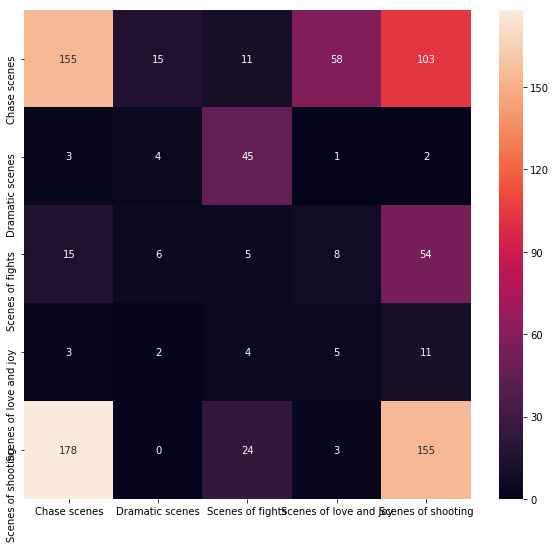

In [31]:
y_pred = vgg_ft_score_video1
y_pred_classes = np.argmax(y_pred,axis=1)
labels = data_video1.classes
#compute conf mat
conf_mat = confusion_matrix (labels,y_pred_classes)
#plot the con mat
label_names = ["Chase scenes", "Dramatic scenes", "Scenes of fights", "Scenes of love and joy", "Scenes of shooting"]
f,ax = plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)
plt.show()

In [32]:
#Creamos collages de fotos, un collage por clase. Cada collage muestra las fotos que el modelo ha definido en una de las clases.
#Collage1 - chase scenes
#Collage2 - dramatic scenes
#Collage3 - scenes of fight
#Collage4 - scenes of love and joy
#Collage5 - scenes of shooting

framefolder = ('new_data/frames/video data1/chase1', 'new_data/frames/video data1/drama1',
              'new_data/frames/video data1/fight1', 'new_data/frames/video data1/love_and_joy1',
              'new_data/frames/video data1/shooting1')
chase_frames, drama_frames, fights_frames, love_and_joy_frames, shooting_frames = show_score(vgg_ft_score_video1, framefolder)

chase = create_collage("Collage results//vgg_ft_video data1//", 1, 1920, 1080, chase_frames)

drama = create_collage("Collage results//vgg_ft_video data1//", 2, 1920, 1080, drama_frames)

fights = create_collage("Collage results//vgg_ft_video data1//", 3, 1920, 1080, fights_frames)

love_and_joy = create_collage("Collage results//vgg_ft_video data1//", 4, 1920, 1080, love_and_joy_frames)

shooting = create_collage("Collage results//vgg_ft_video data1//", 5, 1920, 1080, shooting_frames)

new_data/frames/video data1/chase1/frame4.jpg
new_data/frames/video data1/chase1/frame6.jpg
new_data/frames/video data1/chase1/frame7.jpg
new_data/frames/video data1/chase1/frame55.jpg
new_data/frames/video data1/chase1/frame56.jpg
new_data/frames/video data1/chase1/frame58.jpg
new_data/frames/video data1/chase1/frame63.jpg
new_data/frames/video data1/chase1/frame64.jpg
new_data/frames/video data1/chase1/frame65.jpg
new_data/frames/video data1/chase1/frame67.jpg
new_data/frames/video data1/chase1/frame69.jpg
new_data/frames/video data1/chase1/frame72.jpg
new_data/frames/video data1/chase1/frame75.jpg
new_data/frames/video data1/chase1/frame76.jpg
new_data/frames/video data1/chase1/frame77.jpg
new_data/frames/video data1/chase1/frame78.jpg
new_data/frames/video data1/chase1/frame81.jpg
new_data/frames/video data1/chase1/frame85.jpg
new_data/frames/video data1/chase1/frame86.jpg
new_data/frames/video data1/chase1/frame88.jpg
new_data/frames/video data1/chase1/frame91.jpg
new_data/frames/

new_data/frames/video data1/shooting1/frame260.jpg
new_data/frames/video data1/shooting1/frame261.jpg
new_data/frames/video data1/shooting1/frame265.jpg
new_data/frames/video data1/shooting1/frame267.jpg
new_data/frames/video data1/shooting1/frame268.jpg
new_data/frames/video data1/shooting1/frame269.jpg
new_data/frames/video data1/shooting1/frame270.jpg
new_data/frames/video data1/shooting1/frame271.jpg
new_data/frames/video data1/shooting1/frame272.jpg
new_data/frames/video data1/shooting1/frame273.jpg
new_data/frames/video data1/shooting1/frame274.jpg
new_data/frames/video data1/shooting1/frame275.jpg
new_data/frames/video data1/shooting1/frame278.jpg
new_data/frames/video data1/shooting1/frame280.jpg
new_data/frames/video data1/shooting1/frame283.jpg
new_data/frames/video data1/shooting1/frame284.jpg
new_data/frames/video data1/shooting1/frame285.jpg
new_data/frames/video data1/shooting1/frame286.jpg
new_data/frames/video data1/shooting1/frame287.jpg
new_data/frames/video data1/sho

new_data/frames/video data1/fight1/frame32.jpg
new_data/frames/video data1/fight1/frame47.jpg
new_data/frames/video data1/fight1/frame60.jpg
new_data/frames/video data1/love_and_joy1/frame2.jpg
new_data/frames/video data1/love_and_joy1/frame3.jpg
new_data/frames/video data1/love_and_joy1/frame7.jpg
new_data/frames/video data1/love_and_joy1/frame21.jpg
new_data/frames/video data1/shooting1/frame6.jpg
new_data/frames/video data1/shooting1/frame8.jpg
new_data/frames/video data1/shooting1/frame11.jpg
new_data/frames/video data1/shooting1/frame30.jpg
new_data/frames/video data1/shooting1/frame33.jpg
new_data/frames/video data1/shooting1/frame44.jpg
new_data/frames/video data1/shooting1/frame46.jpg
new_data/frames/video data1/shooting1/frame53.jpg
new_data/frames/video data1/shooting1/frame57.jpg
new_data/frames/video data1/shooting1/frame112.jpg
new_data/frames/video data1/shooting1/frame149.jpg
new_data/frames/video data1/shooting1/frame150.jpg
new_data/frames/video data1/shooting1/frame15

new_data/frames/video data1/chase1/frame83.jpg
new_data/frames/video data1/chase1/frame84.jpg
new_data/frames/video data1/chase1/frame96.jpg
new_data/frames/video data1/chase1/frame98.jpg
new_data/frames/video data1/chase1/frame105.jpg
new_data/frames/video data1/chase1/frame108.jpg
new_data/frames/video data1/chase1/frame109.jpg
new_data/frames/video data1/chase1/frame113.jpg
new_data/frames/video data1/chase1/frame119.jpg
new_data/frames/video data1/chase1/frame123.jpg
new_data/frames/video data1/chase1/frame124.jpg
new_data/frames/video data1/chase1/frame125.jpg
new_data/frames/video data1/chase1/frame129.jpg
new_data/frames/video data1/chase1/frame130.jpg
new_data/frames/video data1/chase1/frame155.jpg
new_data/frames/video data1/chase1/frame157.jpg
new_data/frames/video data1/chase1/frame159.jpg
new_data/frames/video data1/chase1/frame162.jpg
new_data/frames/video data1/chase1/frame182.jpg
new_data/frames/video data1/chase1/frame186.jpg
new_data/frames/video data1/chase1/frame203.

new_data/frames/video data1/shooting1/frame241.jpg
new_data/frames/video data1/shooting1/frame243.jpg
new_data/frames/video data1/shooting1/frame244.jpg
new_data/frames/video data1/shooting1/frame245.jpg
new_data/frames/video data1/shooting1/frame246.jpg
new_data/frames/video data1/shooting1/frame247.jpg
new_data/frames/video data1/shooting1/frame248.jpg
new_data/frames/video data1/shooting1/frame249.jpg
new_data/frames/video data1/shooting1/frame250.jpg
new_data/frames/video data1/shooting1/frame251.jpg
new_data/frames/video data1/shooting1/frame252.jpg
new_data/frames/video data1/shooting1/frame253.jpg
new_data/frames/video data1/shooting1/frame255.jpg
new_data/frames/video data1/shooting1/frame262.jpg
new_data/frames/video data1/shooting1/frame263.jpg
new_data/frames/video data1/shooting1/frame264.jpg
new_data/frames/video data1/shooting1/frame277.jpg
new_data/frames/video data1/shooting1/frame279.jpg
new_data/frames/video data1/shooting1/frame281.jpg
new_data/frames/video data1/sho

In [34]:
vgg_ft_score_video2, loss_video2, accuracy_video2, data_video2 = generator_model_results(vgg_ft_loaded_model, videodata2)
print("Loss: ", loss_video2)
print("Accuracy: ", accuracy_video2)

Found 722 images belonging to 5 classes.
Loss:  3.929724691339112
Accuracy:  0.33240997229916897


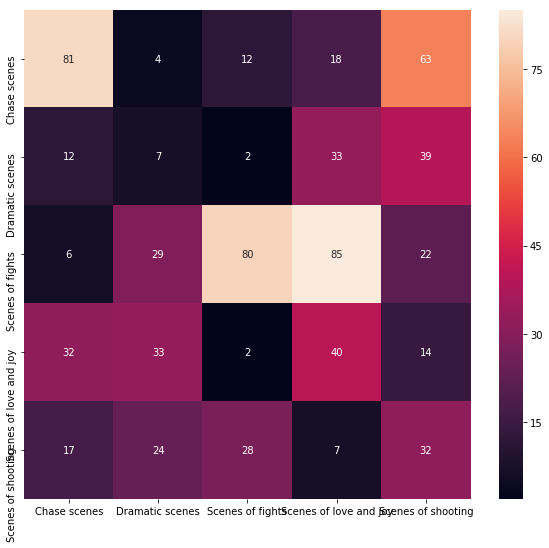

In [35]:
y_pred = vgg_ft_score_video2
y_pred_classes = np.argmax(y_pred,axis=1)
labels = data_video2.classes
#compute conf mat
conf_mat = confusion_matrix (labels,y_pred_classes)
#plot the con mat
label_names = ["Chase scenes", "Dramatic scenes", "Scenes of fights", "Scenes of love and joy", "Scenes of shooting"]
f,ax = plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)
plt.show()

In [36]:
#Creamos collages de fotos, un collage por clase. Cada collage muestra las fotos que el modelo ha definido en una de las clases.
#Collage1 - chase scenes
#Collage2 - dramatic scenes
#Collage3 - scenes of fight
#Collage4 - scenes of love and joy
#Collage5 - scenes of shooting

framefolder = ('new_data/frames/video data2/chase2', 'new_data/frames/video data2/drama2',
              'new_data/frames/video data2/fight2', 'new_data/frames/video data2/love_and_joy2',
              'new_data/frames/video data2/shooting2')
chase_frames, drama_frames, fights_frames, love_and_joy_frames, shooting_frames = show_score(vgg_ft_score_video2, framefolder)

chase = create_collage("Collage results//vgg_ft_video data2//", 1, 1920, 1080, chase_frames)

drama = create_collage("Collage results//vgg_ft_video data2//", 2, 1920, 1080, drama_frames)

fights = create_collage("Collage results//vgg_ft_video data2//", 3, 1920, 1080, fights_frames)

love_and_joy = create_collage("Collage results//vgg_ft_video data2//", 4, 1920, 1080, love_and_joy_frames)

shooting = create_collage("Collage results//vgg_ft_video data2//", 5, 1920, 1080, shooting_frames)

new_data/frames/video data2/chase2/frame1.jpg
new_data/frames/video data2/chase2/frame2.jpg
new_data/frames/video data2/chase2/frame7.jpg
new_data/frames/video data2/chase2/frame9.jpg
new_data/frames/video data2/chase2/frame13.jpg
new_data/frames/video data2/chase2/frame20.jpg
new_data/frames/video data2/chase2/frame21.jpg
new_data/frames/video data2/chase2/frame23.jpg
new_data/frames/video data2/chase2/frame24.jpg
new_data/frames/video data2/chase2/frame29.jpg
new_data/frames/video data2/chase2/frame30.jpg
new_data/frames/video data2/chase2/frame33.jpg
new_data/frames/video data2/chase2/frame34.jpg
new_data/frames/video data2/chase2/frame35.jpg
new_data/frames/video data2/chase2/frame36.jpg
new_data/frames/video data2/chase2/frame37.jpg
new_data/frames/video data2/chase2/frame38.jpg
new_data/frames/video data2/chase2/frame39.jpg
new_data/frames/video data2/chase2/frame40.jpg
new_data/frames/video data2/chase2/frame41.jpg
new_data/frames/video data2/chase2/frame42.jpg
new_data/frames/v

new_data/frames/video data2/love_and_joy2/frame57.jpg
new_data/frames/video data2/love_and_joy2/frame58.jpg
new_data/frames/video data2/love_and_joy2/frame59.jpg
new_data/frames/video data2/love_and_joy2/frame62.jpg
new_data/frames/video data2/love_and_joy2/frame68.jpg
new_data/frames/video data2/love_and_joy2/frame72.jpg
new_data/frames/video data2/love_and_joy2/frame73.jpg
new_data/frames/video data2/love_and_joy2/frame74.jpg
new_data/frames/video data2/love_and_joy2/frame75.jpg
new_data/frames/video data2/love_and_joy2/frame80.jpg
new_data/frames/video data2/love_and_joy2/frame81.jpg
new_data/frames/video data2/love_and_joy2/frame82.jpg
new_data/frames/video data2/love_and_joy2/frame83.jpg
new_data/frames/video data2/love_and_joy2/frame84.jpg
new_data/frames/video data2/love_and_joy2/frame85.jpg
new_data/frames/video data2/love_and_joy2/frame89.jpg
new_data/frames/video data2/love_and_joy2/frame95.jpg
new_data/frames/video data2/love_and_joy2/frame96.jpg
new_data/frames/video data2/

new_data/frames/video data2/drama2/frame12.jpg
new_data/frames/video data2/drama2/frame18.jpg
new_data/frames/video data2/drama2/frame23.jpg
new_data/frames/video data2/drama2/frame25.jpg
new_data/frames/video data2/drama2/frame26.jpg
new_data/frames/video data2/drama2/frame29.jpg
new_data/frames/video data2/drama2/frame34.jpg
new_data/frames/video data2/drama2/frame45.jpg
new_data/frames/video data2/drama2/frame46.jpg
new_data/frames/video data2/drama2/frame47.jpg
new_data/frames/video data2/drama2/frame48.jpg
new_data/frames/video data2/drama2/frame49.jpg
new_data/frames/video data2/drama2/frame50.jpg
new_data/frames/video data2/drama2/frame57.jpg
new_data/frames/video data2/drama2/frame58.jpg
new_data/frames/video data2/drama2/frame59.jpg
new_data/frames/video data2/drama2/frame61.jpg
new_data/frames/video data2/drama2/frame65.jpg
new_data/frames/video data2/drama2/frame67.jpg
new_data/frames/video data2/drama2/frame68.jpg
new_data/frames/video data2/drama2/frame69.jpg
new_data/fram

new_data/frames/video data2/chase2/frame80.jpg
new_data/frames/video data2/chase2/frame83.jpg
new_data/frames/video data2/chase2/frame84.jpg
new_data/frames/video data2/chase2/frame85.jpg
new_data/frames/video data2/chase2/frame86.jpg
new_data/frames/video data2/chase2/frame87.jpg
new_data/frames/video data2/chase2/frame88.jpg
new_data/frames/video data2/chase2/frame90.jpg
new_data/frames/video data2/chase2/frame96.jpg
new_data/frames/video data2/chase2/frame98.jpg
new_data/frames/video data2/chase2/frame102.jpg
new_data/frames/video data2/chase2/frame103.jpg
new_data/frames/video data2/chase2/frame104.jpg
new_data/frames/video data2/chase2/frame105.jpg
new_data/frames/video data2/chase2/frame107.jpg
new_data/frames/video data2/chase2/frame109.jpg
new_data/frames/video data2/chase2/frame110.jpg
new_data/frames/video data2/chase2/frame112.jpg
new_data/frames/video data2/chase2/frame113.jpg
new_data/frames/video data2/chase2/frame116.jpg
new_data/frames/video data2/chase2/frame117.jpg
ne